# Menzili Properties Analysis - Tunisia Real Estate Market 🏘️

## Project Overview 📊
This notebook explores a dataset of real estate properties in Tunisia to prepare for a price prediction model. We'll analyze property characteristics, clean the data, and examine price distributions across different property types.

## 1. Setup and Initial Data Exploration 🔍

Let's start by importing the necessary libraries and loading our dataset.

In [1]:
# Import required libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib.ticker import FuncFormatter
from sklearn.preprocessing import OneHotEncoder


# Load the dataset
df = pd.read_csv('menzili_properties.csv')

# Display the first few rows to understand the structure
df.head(5)

,price,property_type,bedrooms,bathrooms,total_rooms,living_area,land_area,construction_year,neighborhood,city,...,interphone,terrace,electric_heating,elevator,alarm_system,internet_access,sea_view,furnished,central_heating,kitchen_equipped
0,1250000.0,Appartement,3,NaN,4,178.0,178.0,NaN,La Marsa,Tunis,...,1,1,1,1,1,1,1,0,1,1
1,360000.0,Appartement,3,NaN,4,110.0,110.0,NaN,La Marsa,Tunis,...,1,1,1,1,1,1,1,1,1,1
2,320000.0,Appartement,1,1,NaN,53.0,0.0,NaN,La Marsa,Tunis,...,1,1,1,1,1,1,1,1,1,1
3,422000.0,Appartement,2,2,3,125.0,125.0,2022.0,La Soukra,Ariana,...,0,0,0,0,1,0,1,1,0,0
4,245000.0,Appartement,1,1,2,74.0,0.0,2024.0,Mrezga,Nabeul,...,0,0,1,1,0,0,1,1,0,0


The dataset contains information about properties in Tunisia including:
- 🏠 Price and physical characteristics (bedrooms, bathrooms, living area)
- 📍 Location information (neighborhood, city)
- 🏊 Amenities (pool, garden, elevator, etc.)
- 🏗️ Other features like construction year and furnishing status

Let's check the overall structure of our dataset:

In [2]:
# Get information about the dataset
df.info()

# Check dataset dimensions
df.shape

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14349 entries, 0 to 14348
Data columns (total 28 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   price               14349 non-null  float64
 1   property_type       14349 non-null  object 
 2   bedrooms            11240 non-null  object 
 3   bathrooms           10274 non-null  object 
 4   total_rooms         9103 non-null   object 
 5   living_area         14349 non-null  float64
 6   land_area           14349 non-null  float64
 7   construction_year   3764 non-null   float64
 8   neighborhood        14341 non-null  object 
 9   city                14341 non-null  object 
 10  climatisation       14349 non-null  int64  
 11  parabole_tv         14349 non-null  int64  
 12  pool                14349 non-null  int64  
 13  handicapped_access  14349 non-null  int64  
 14  parking             14349 non-null  int64  
 15  garage              14349 non-null  int64  
 16  gard

(14349, 28)

We have 14,349 properties with 28 feature columns. Some key observations:
- ⚠️ Several columns have missing values (bedrooms, bathrooms, total_rooms, construction_year)
- ✅ Most amenity features are binary (represented as 0/1)
- 🔢 We have both numerical (float64) and categorical (object) data types

## 2. Initial Price Analysis 💰

Let's explore the price distribution to understand our target variable:

In [3]:
# Check price statistics
df['price'].describe()

count    1.434900e+04
mean     6.970098e+10
std      8.348130e+12
min      1.000000e+00
25%      1.250000e+05
50%      2.650000e+05
75%      5.500000e+05
max      1.000000e+15
Name: price, dtype: float64

The price distribution shows:
- 📊 Mean value of approximately 6.97×10^10 (extremely high)
- 🔻 Minimum price of 1 (likely an error)
- 🔺 Maximum price of 10^15 (definitely an outlier)
- 📈 The large gap between median (265,000) and mean indicates extreme outliers

## 3. Data Cleaning and Preprocessing 🧹

### 3.1 Handling Missing Values ❓

Let's first filter out rows where too many key features are missing:

In [4]:
feature_columns = ['bedrooms', 'bathrooms', 'total_rooms']

# Drop rows where ALL specified columns are null
df = df[~(df[feature_columns].isnull().all(axis=1))]
df.shape

(11418, 28)

After removing rows with missing values for all key features, we have 11,418 properties remaining.

### 3.2 Removing Unrealistic Prices 🚫

Let's set a minimum threshold for property prices to filter out unrealistic values:

In [5]:
# Filter out properties with prices below 45,000 (likely errors)
df = df[df['price'] >= 45000]
df.shape

(9438, 28)

We now have 9,438 properties with reasonable price values.

## 4. Price Distribution Analysis 📉

Let's create a utility function to format price values for better readability:

In [6]:
def format_price(price):
    if price >= 1_000_000:
        return f"{price/1_000_000:.2f}M"
    elif price >= 1_000:
        return f"{price/1_000:.1f}K"
    else:
        return f"{price:.0f}"

# Print basic statistics of the price column
print("Price Statistics:")
print(df['price'].describe())

Price Statistics:
count    9.438000e+03
mean     6.546222e+06
std      9.052121e+07
min      4.500000e+04
25%      1.990000e+05
50%      3.255000e+05
75%      6.200000e+05
max      3.000000e+09
Name: price, dtype: float64


The statistics show:
- 🧮 Mean: 6.55M
- 📊 Median: 325.5K
- ↔️ Range: 45K to 3B

The huge difference between mean and median confirms we have extreme outliers.

### 4.1 Visualizing the Original Price Distribution 📊

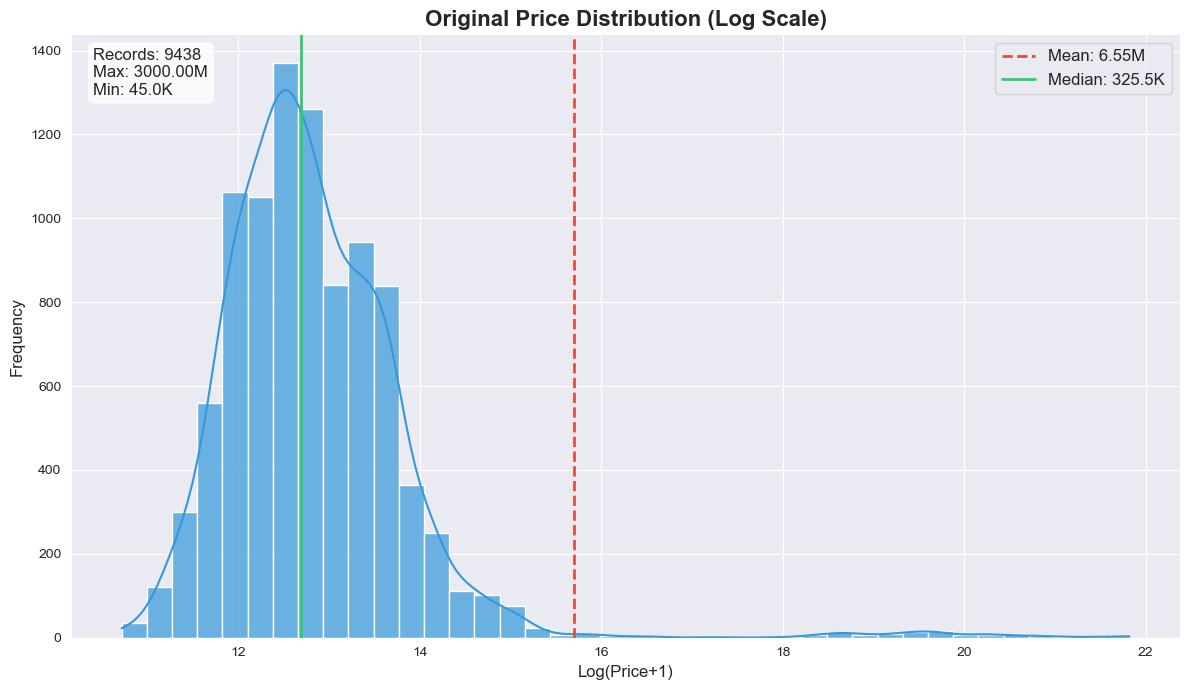

In [7]:
# Create a figure for the original log-transformed distribution
plt.figure(figsize=(12, 7))

# Calculate statistics
mean_price = df['price'].mean()
median_price = df['price'].median()
count_before = len(df)
max_price = df['price'].max()
min_price = df['price'].min()

# Plot the log-transformed distribution
sns.histplot(np.log1p(df['price']), kde=True, color='#3498db', alpha=0.7, bins=40)

# Add lines for mean and median
plt.axvline(np.log1p(mean_price), color='#e74c3c', linestyle='--', linewidth=2, 
            label=f'Mean: {format_price(mean_price)}')
plt.axvline(np.log1p(median_price), color='#2ecc71', linestyle='-', linewidth=2, 
            label=f'Median: {format_price(median_price)}')

# Set title and labels
plt.title('Original Price Distribution (Log Scale)', fontsize=16, fontweight='bold')
plt.xlabel('Log(Price+1)', fontsize=12)
plt.ylabel('Frequency', fontsize=12)
plt.legend(fontsize=12)

# Add annotation with key statistics
plt.text(0.02, 0.9, f'Records: {count_before}\nMax: {format_price(max_price)}\nMin: {format_price(min_price)}',
         transform=plt.gca().transAxes, fontsize=12,
         bbox=dict(facecolor='white', alpha=0.8, boxstyle='round,pad=0.3'))

plt.tight_layout()
plt.show()

The log-transformed distribution helps us see the general pattern, but the boxplot will better highlight outliers:

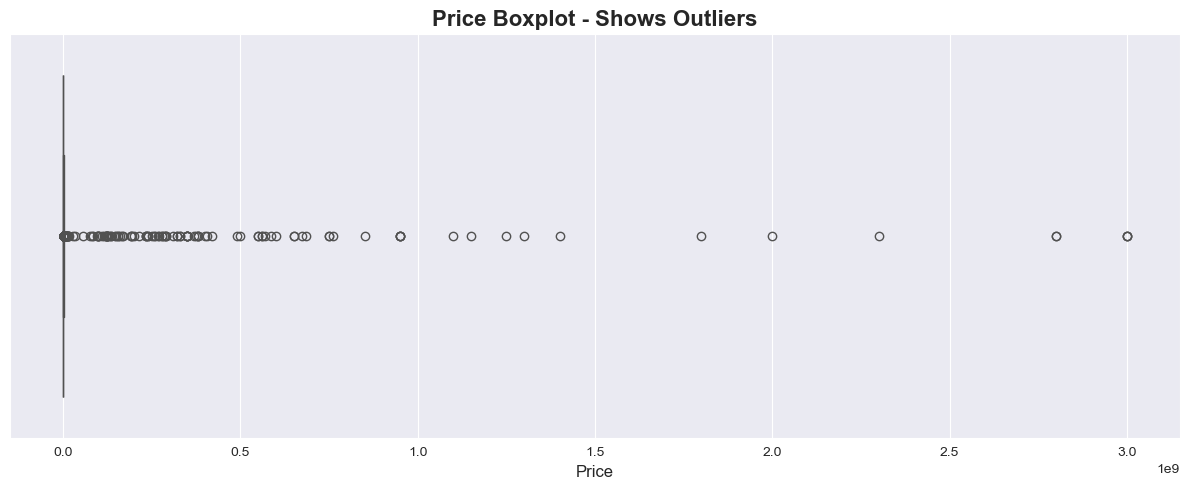

In [8]:
# Create a figure for the boxplot
plt.figure(figsize=(12, 5))

# Create the boxplot
sns.boxplot(x=df['price'], color='#3498db')

# Set title and labels
plt.title('Price Boxplot - Shows Outliers', fontsize=16, fontweight='bold')
plt.xlabel('Price', fontsize=12)

# Format x-axis to show large numbers clearly
plt.ticklabel_format(style='sci', axis='x', scilimits=(0,0))

plt.tight_layout()
plt.show()

The boxplot clearly shows extreme outliers affecting our distribution.

## 5. Property Type Analysis 🏢🏡

Let's check what property types we have in our dataset:

In [9]:
df['property_type'].unique()

array(['Appartement', 'Maison'], dtype=object)

We have two main property types: 'Appartement' (Apartment) and 'Maison' (House).

## 6. Outlier Removal 🗑️

We'll use the IQR (Interquartile Range) method to remove outliers, but split by property type to account for natural price differences:

In [10]:
# Create copies of the original dataframe
df_original = df.copy()

# Separate by property type
appartements = df[df['property_type'] == 'Appartement']
maisons = df[df['property_type'] == 'Maison']

# Function to remove outliers for a specific dataframe
def remove_outliers_by_iqr(dataframe, column='price'):
    property_type = dataframe['property_type'].iloc[0]
    
    Q1 = dataframe[column].quantile(0.25)
    Q3 = dataframe[column].quantile(0.75)
    IQR = Q3 - Q1
    
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    
    # Print boundaries for this property type
    print(f"Property type: {property_type}")
    print(f"Q1: {format_price(Q1)}, Q3: {format_price(Q3)}, IQR: {format_price(IQR)}")
    print(f"Lower bound: {format_price(lower_bound)}, Upper bound: {format_price(upper_bound)}")
    
    # Filter and return
    filtered_df = dataframe[(dataframe[column] >= lower_bound) & 
                           (dataframe[column] <= upper_bound)]
    
    # Calculate outliers removed
    outliers_count = len(dataframe) - len(filtered_df)
    outliers_percentage = (outliers_count / len(dataframe)) * 100
    print(f"Removed {outliers_count} outliers ({outliers_percentage:.2f}%)\n")
    
    return filtered_df

# Apply outlier removal to each property type separately
appartements_clean = remove_outliers_by_iqr(appartements)
maisons_clean = remove_outliers_by_iqr(maisons)

# Combine the cleaned dataframes
df_clean = pd.concat([appartements_clean, maisons_clean])

# Update the original dataframe
df = df_clean.copy()

# Print comparison statistics
print("Original dataset statistics by property type:")
print(df_original.groupby('property_type')['price'].describe())
print("\nCleaned dataset statistics by property type:")
print(df.groupby('property_type')['price'].describe())

Property type: Appartement
Q1: 170.0K, Q3: 355.0K, IQR: 185.0K
Lower bound: -107500, Upper bound: 632.5K
Removed 304 outliers (6.99%)

Property type: Maison
Q1: 260.0K, Q3: 850.0K, IQR: 590.0K
Lower bound: -625000, Upper bound: 1.74M
Removed 358 outliers (7.03%)

Original dataset statistics by property type:
                count          mean           std      min       25%  \
property_type                                                          
Appartement    4346.0  2.531352e+06  2.707382e+07  45000.0  170000.0   
Maison         5092.0  9.972896e+06  1.205736e+08  45000.0  260000.0   

                    50%       75%           max  
property_type                                    
Appartement    250000.0  355000.0  6.750000e+08  
Maison         500000.0  850000.0  3.000000e+09  

Cleaned dataset statistics by property type:
                count           mean            std      min       25%  \
property_type                                                            
Apparte

This gives us a much cleaner dataset by:
- 🗑️ Removing ~7% of properties from each category
- ⬆️ Setting appropriate upper bounds (632.5K for apartments, 1.74M for houses)
- ↔️ Retaining the natural price difference between property types

### 6.1 Visualizing the Before/After Outlier Removal 📊🔄📊

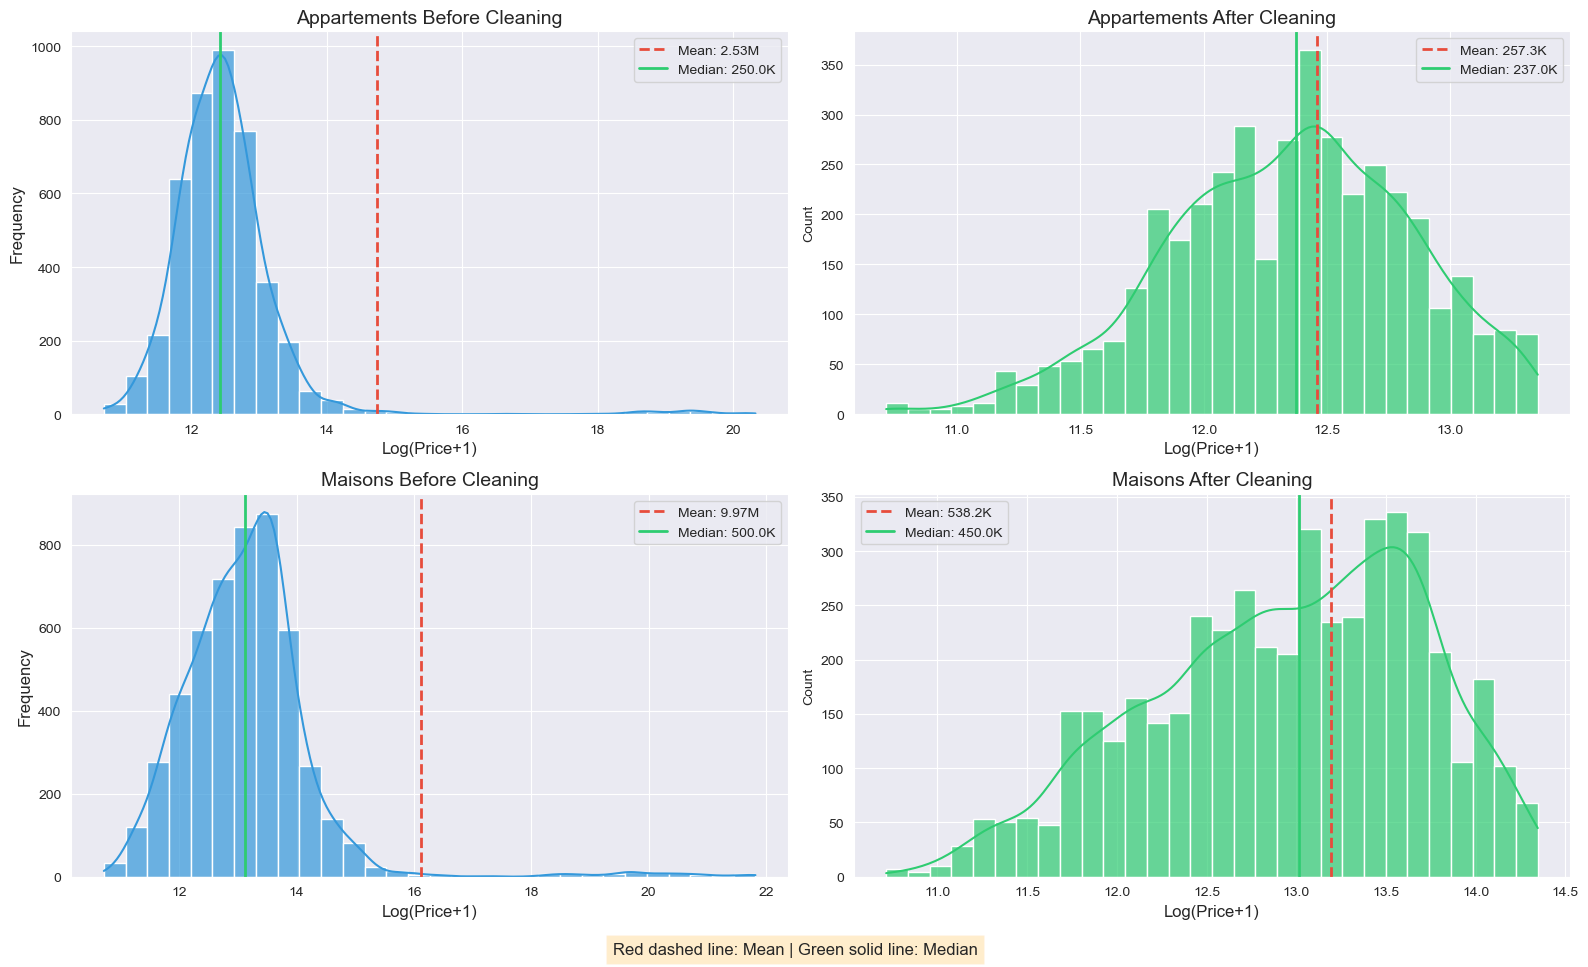

In [11]:
# Now create your visualization with the properly cleaned data
plt.figure(figsize=(16, 10))

# Top row: Appartements before and after
plt.subplot(2, 2, 1)
sns.histplot(np.log1p(appartements['price']), kde=True, color='#3498db', alpha=0.7, bins=30)
# Add mean and median lines
plt.axvline(np.log1p(appartements['price'].mean()), color='#e74c3c', linestyle='--', linewidth=2, 
            label=f'Mean: {format_price(appartements["price"].mean())}')
plt.axvline(np.log1p(appartements['price'].median()), color='#2ecc71', linestyle='-', linewidth=2,
            label=f'Median: {format_price(appartements["price"].median())}')
plt.legend(fontsize=10)
plt.title('Appartements Before Cleaning', fontsize=14)
plt.xlabel('Log(Price+1)', fontsize=12)
plt.ylabel('Frequency', fontsize=12)

plt.subplot(2, 2, 2)
sns.histplot(np.log1p(appartements_clean['price']), kde=True, color='#2ecc71', alpha=0.7, bins=30)
# Add mean and median lines
plt.axvline(np.log1p(appartements_clean['price'].mean()), color='#e74c3c', linestyle='--', linewidth=2,
            label=f'Mean: {format_price(appartements_clean["price"].mean())}')
plt.axvline(np.log1p(appartements_clean['price'].median()), color='#2ecc71', linestyle='-', linewidth=2,
            label=f'Median: {format_price(appartements_clean["price"].median())}')
plt.legend(fontsize=10)
plt.title('Appartements After Cleaning', fontsize=14)
plt.xlabel('Log(Price+1)', fontsize=12)

# Bottom row: Maisons before and after
plt.subplot(2, 2, 3)
sns.histplot(np.log1p(maisons['price']), kde=True, color='#3498db', alpha=0.7, bins=30)
# Add mean and median lines
plt.axvline(np.log1p(maisons['price'].mean()), color='#e74c3c', linestyle='--', linewidth=2,
            label=f'Mean: {format_price(maisons["price"].mean())}')
plt.axvline(np.log1p(maisons['price'].median()), color='#2ecc71', linestyle='-', linewidth=2,
            label=f'Median: {format_price(maisons["price"].median())}')
plt.legend(fontsize=10)
plt.title('Maisons Before Cleaning', fontsize=14)
plt.xlabel('Log(Price+1)', fontsize=12)
plt.ylabel('Frequency', fontsize=12)

plt.subplot(2, 2, 4)
sns.histplot(np.log1p(maisons_clean['price']), kde=True, color='#2ecc71', alpha=0.7, bins=30)
# Add mean and median lines
plt.axvline(np.log1p(maisons_clean['price'].mean()), color='#e74c3c', linestyle='--', linewidth=2,
            label=f'Mean: {format_price(maisons_clean["price"].mean())}')
plt.axvline(np.log1p(maisons_clean['price'].median()), color='#2ecc71', linestyle='-', linewidth=2,
            label=f'Median: {format_price(maisons_clean["price"].median())}')
plt.legend(fontsize=10)
plt.title('Maisons After Cleaning', fontsize=14)
plt.xlabel('Log(Price+1)', fontsize=12)

# Add a common legend explaining line colors
plt.figtext(0.5, 0.01, 
            "Red dashed line: Mean | Green solid line: Median",
            ha="center", fontsize=12, bbox={"facecolor":"orange", "alpha":0.2, "pad":5})

plt.tight_layout(rect=[0, 0.03, 1, 0.97])
plt.show()

The comparison shows how outlier removal:
- 🔄 Transformed the apartment prices from a heavily skewed distribution to a more normal one
- ↔️ Brought the mean and median closer together for both property types
- 🏢🏡 Preserved the natural price differences between property types

## 7. Final Analysis of Cleaned Data ✨

### 7.1 Distribution Comparison Between Property Types 📊↔️📊

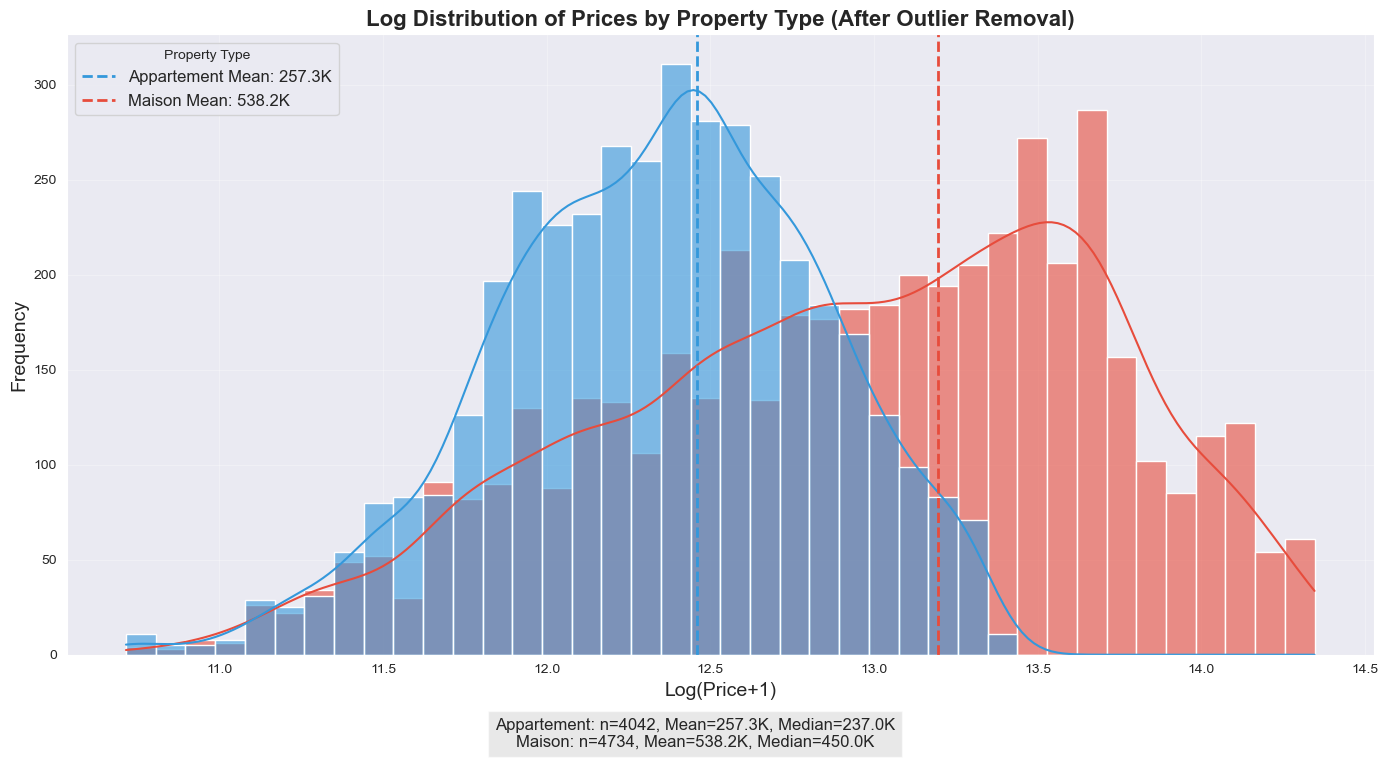

In [12]:
# Create a figure for the log distribution
plt.figure(figsize=(14, 8))

# Plot the log distribution of prices for both property types
sns.histplot(data=df, x=np.log1p(df['price']), hue='property_type', 
             kde=True, alpha=0.6, bins=40, palette=['#3498db', '#e74c3c'])

# Add vertical lines for the mean of each property type
appartement_mean = np.log1p(df[df['property_type'] == 'Appartement']['price'].mean())
maison_mean = np.log1p(df[df['property_type'] == 'Maison']['price'].mean())

plt.axvline(appartement_mean, color='#3498db', linestyle='--', linewidth=2, 
            label=f'Appartement Mean: {format_price(df[df["property_type"] == "Appartement"]["price"].mean())}')
plt.axvline(maison_mean, color='#e74c3c', linestyle='--', linewidth=2,
            label=f'Maison Mean: {format_price(df[df["property_type"] == "Maison"]["price"].mean())}')

# Add labels and title
plt.title('Log Distribution of Prices by Property Type (After Outlier Removal)', fontsize=16, fontweight='bold')
plt.xlabel('Log(Price+1)', fontsize=14)
plt.ylabel('Frequency', fontsize=14)
plt.legend(title='Property Type', fontsize=12)
plt.grid(True, alpha=0.3)

# Add summary statistics as text
stats_text = (
    f"Appartement: n={len(df[df['property_type'] == 'Appartement'])}, "
    f"Mean={format_price(df[df['property_type'] == 'Appartement']['price'].mean())}, "
    f"Median={format_price(df[df['property_type'] == 'Appartement']['price'].median())}\n"
    f"Maison: n={len(df[df['property_type'] == 'Maison'])}, "
    f"Mean={format_price(df[df['property_type'] == 'Maison']['price'].mean())}, "
    f"Median={format_price(df[df['property_type'] == 'Maison']['price'].median())}"
)
plt.figtext(0.5, 0.01, stats_text, ha="center", fontsize=12, 
            bbox={"facecolor":"lightgray", "alpha":0.5, "pad":5})

# Adjust layout and show plot
plt.tight_layout(rect=[0, 0.05, 1, 0.95])
plt.show()

In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 8776 entries, 1 to 14348
Data columns (total 28 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   price               8776 non-null   float64
 1   property_type       8776 non-null   object 
 2   bedrooms            8669 non-null   object 
 3   bathrooms           7937 non-null   object 
 4   total_rooms         7019 non-null   object 
 5   living_area         8776 non-null   float64
 6   land_area           8776 non-null   float64
 7   construction_year   2622 non-null   float64
 8   neighborhood        8774 non-null   object 
 9   city                8774 non-null   object 
 10  climatisation       8776 non-null   int64  
 11  parabole_tv         8776 non-null   int64  
 12  pool                8776 non-null   int64  
 13  handicapped_access  8776 non-null   int64  
 14  parking             8776 non-null   int64  
 15  garage              8776 non-null   int64  
 16  garden    

### 7.2 Boxplot Comparison 📦

C:\Users\MSI\AppData\Local\Temp\ipykernel_4696\2075218180.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='property_type', y='price', data=df, palette=['#3498db', '#e74c3c'])


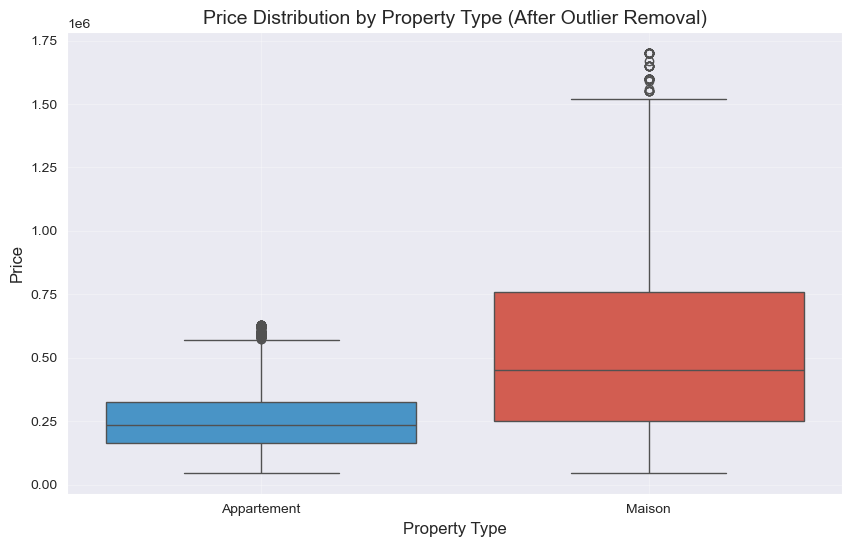

In [14]:
# You might also want to see a boxplot comparison
plt.figure(figsize=(10, 6))
sns.boxplot(x='property_type', y='price', data=df, palette=['#3498db', '#e74c3c'])
plt.title('Price Distribution by Property Type (After Outlier Removal)', fontsize=14)
plt.ylabel('Price', fontsize=12)
plt.xlabel('Property Type', fontsize=12)
plt.grid(True, alpha=0.3)
plt.show()

The boxplot clearly shows the price differences between 'Appartement' and 'Maison'.

### 7.3 Overall Price Distribution 📊

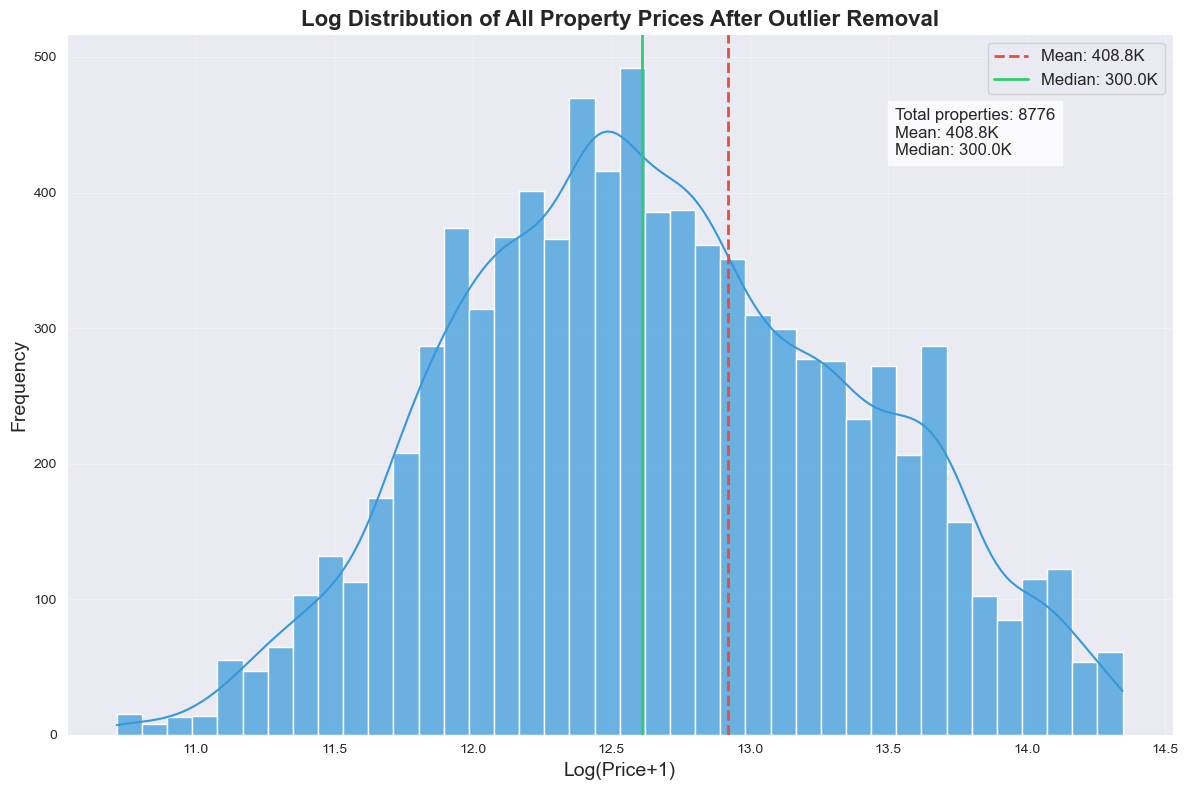

In [15]:
# Create a figure for the overall price distribution after outlier removal
plt.figure(figsize=(12, 8))

# Plot the log distribution of all prices after outlier removal
sns.histplot(np.log1p(df['price']), kde=True, color='#3498db', alpha=0.7, bins=40)

# Add vertical lines for mean and median
mean_price = df['price'].mean()
median_price = df['price'].median()

plt.axvline(np.log1p(mean_price), color='#e74c3c', linestyle='--', linewidth=2, 
            label=f'Mean: {format_price(mean_price)}')
plt.axvline(np.log1p(median_price), color='#2ecc71', linestyle='-', linewidth=2,
            label=f'Median: {format_price(median_price)}')

# Add labels and title
plt.title('Log Distribution of All Property Prices After Outlier Removal', fontsize=16, fontweight='bold')
plt.xlabel('Log(Price+1)', fontsize=14)
plt.ylabel('Frequency', fontsize=14)
plt.legend(fontsize=12)
plt.grid(True, alpha=0.3)

# Add summary statistics as text
stats_text = (
    f"Total properties: {len(df)}\n"
    f"Mean: {format_price(mean_price)}\n"
    f"Median: {format_price(median_price)}"
)
plt.figtext(0.75, 0.80, stats_text, fontsize=12, 
            bbox={"facecolor":"white", "alpha":0.8, "pad":5})

plt.tight_layout()
plt.show()


In this section, we'll analyze the property types in our dataset to understand the distribution and price differences between different property categories (apartments vs. houses).

## 8. Summary and Next Steps 🏁🚀

Our final cleaned dataset has 8,776 properties with a more reasonable price distribution:
- 📊 The mean and median prices are much closer, indicating a more balanced dataset
-   We've preserved the natural price differences between apartments and houses
- 📈 The distributions look more normal (on a log scale), which will help with modeling

### Key Insights 🔍
1. **Data quality**: We started with ~14,000 properties but removed about 40% due to missing values and price outliers
2. **Property type differences**: Houses ('Maison') are generally about twice as expensive as apartments ('Appartement')
3. **Outlier impact**: Extreme outliers were skewing our statistics significantly
4. **Price ranges**:
   - 🏢 Apartments: Typically 165K-327K TND with a mean of 257K TND
   - 🏡 Houses: Typically 250K-760K TND with a mean of 538K TND


## 1. Property Type Distribution 📊

Let's first identify the unique property types in our dataset and check for any missing values:

In [16]:
# Check unique property types
df['property_type'].unique()

array(['Appartement', 'Maison'], dtype=object)

In [17]:
# Check for null values
null_count = df['property_type'].isnull().sum()
print(f"Number of null values in 'property_type': {null_count}")

Number of null values in 'property_type': 0


Great! We have two main property types ('Appartement' and 'Maison') with no missing values, which makes our analysis straightforward.

Now, let's examine the distribution of property types in our dataset:

In [18]:
# Count and percentage distribution of property types
property_counts = df['property_type'].value_counts()
property_percentage = df['property_type'].value_counts(normalize=True) * 100

# Create a DataFrame for the counts and percentages
property_distribution = pd.DataFrame({
    'Count': property_counts,
    'Percentage': property_percentage
})

print("Property Type Distribution:")
print(property_distribution)

Property Type Distribution:
               Count  Percentage
property_type                   
Maison          4734   53.942571
Appartement     4042   46.057429


The distribution shows we have a roughly balanced dataset with slightly more houses than apartments. Let's visualize this distribution with a pie chart:

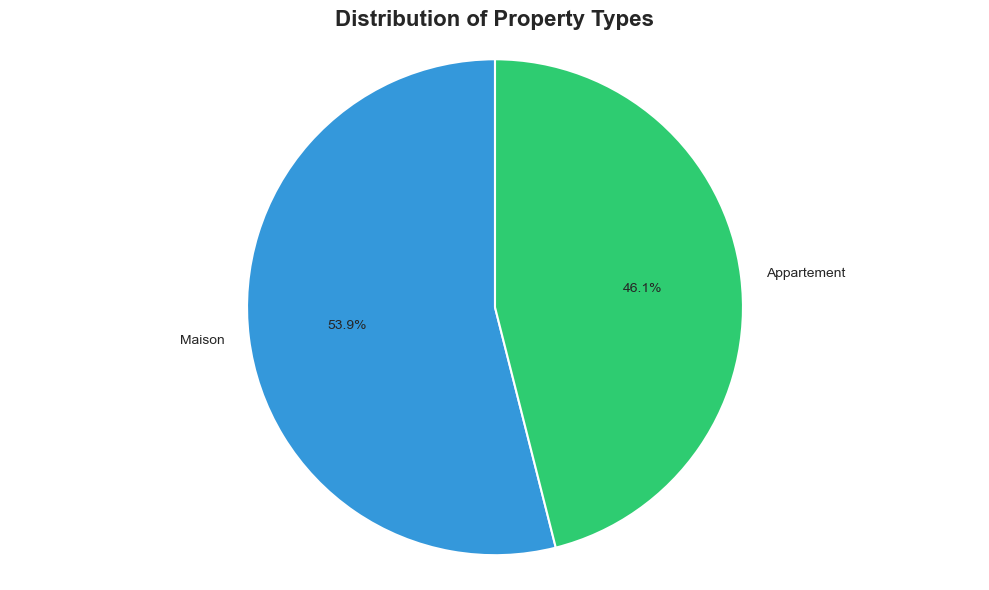

In [19]:
# Visualize the distribution with a pie chart
plt.figure(figsize=(10, 6))
plt.pie(property_percentage, labels=property_percentage.index, 
        autopct='%1.1f%%', startangle=90, colors=['#3498db', '#2ecc71'],
        wedgeprops={'edgecolor': 'white', 'linewidth': 1.5})
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle
plt.title('Distribution of Property Types', fontsize=16, fontweight='bold')
plt.tight_layout()
plt.show()

## 2. Price Comparison by Property Type 💰🏢🏡

Now, let's analyze how property prices differ between houses and apartments. First, a boxplot to visualize the distributions:

C:\Users\MSI\AppData\Local\Temp\ipykernel_4696\632336175.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='property_type', y='price', data=df, palette=['#3498db', '#2ecc71'])


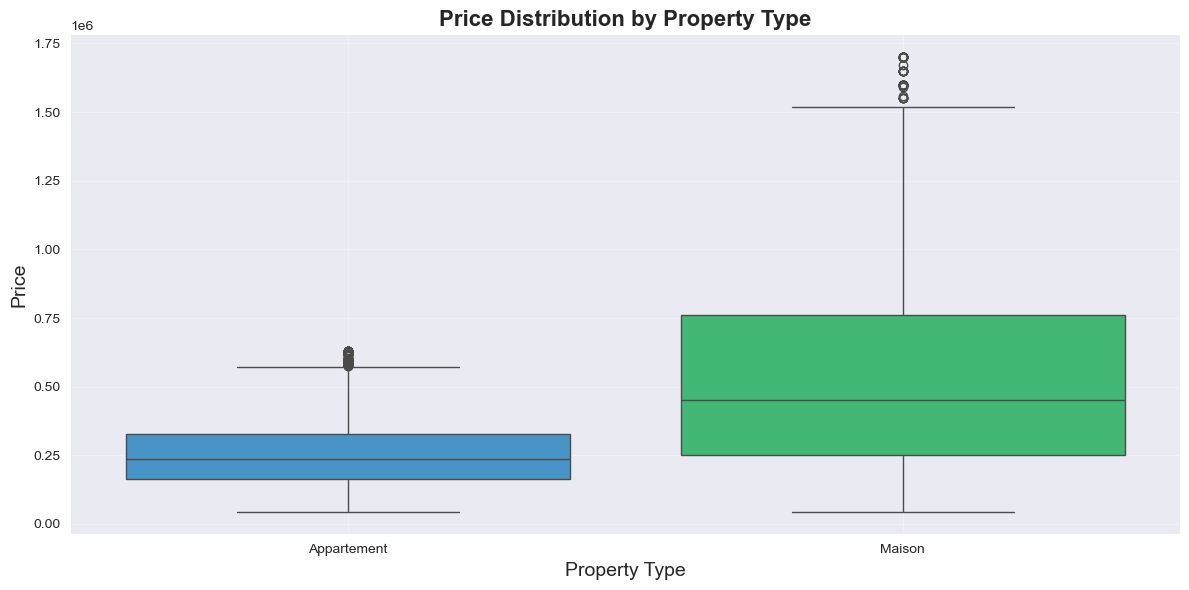

In [20]:
# Compare prices between property types - Box plot
plt.figure(figsize=(12, 6))
sns.boxplot(x='property_type', y='price', data=df, palette=['#3498db', '#2ecc71'])
plt.title('Price Distribution by Property Type', fontsize=16, fontweight='bold')
plt.xlabel('Property Type', fontsize=14)
plt.ylabel('Price', fontsize=14)
plt.ticklabel_format(style='sci', axis='y', scilimits=(0,0))
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()

The boxplot shows that houses ('Maison') generally have higher prices than apartments ('Appartement'), with a wider price range.

Let's calculate some specific statistics for each property type:

In [21]:
# Statistical summary of prices by property type
price_by_property = df.groupby('property_type')['price'].agg(['count', 'min', 'max', 'mean', 'median', 'std'])
price_by_property = price_by_property.reset_index()

# Format the price values for better readability
for col in ['min', 'max', 'mean', 'median', 'std']:
    price_by_property[col] = price_by_property[col].apply(lambda x: f"{x:,.0f}")

print("\nPrice Statistics by Property Type:")
print(price_by_property)


Price Statistics by Property Type:
  property_type  count     min        max     mean   median      std
0   Appartement   4042  45,000    630,000  257,325  237,000  122,115
1        Maison   4734  45,000  1,700,000  538,203  450,000  360,511


These statistics confirm what we observed in the boxplot:

- 🏢 Houses have a higher mean price (538,203) compared to apartments (257,325)
- 🏡 Houses have a higher median price (450,000) compared to apartments (237,000)
- 📈 Houses show much higher standard deviation (360,511) compared to apartments (122,115), indicating greater price variability
- 🔻 Both property types have the same minimum price (45,000), but houses have a much higher maximum price (1,700,000 vs 630,000)

Let's visualize the average prices using a bar chart:

C:\Users\MSI\AppData\Local\Temp\ipykernel_4696\1140839760.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(x=avg_prices.index, y=avg_prices.values, palette=['#3498db', '#2ecc71'])


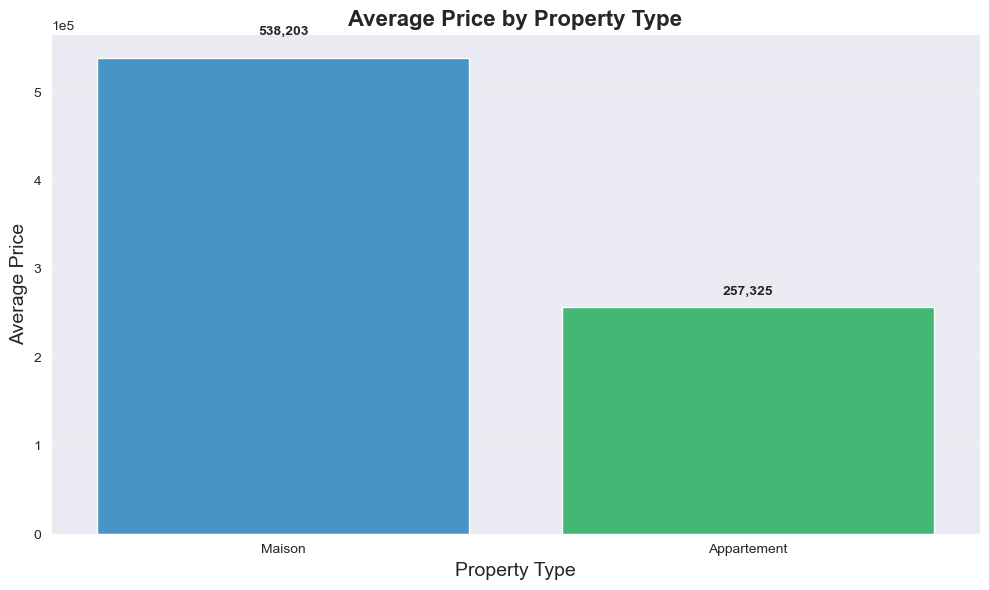

In [22]:
# Bar chart comparing average prices
plt.figure(figsize=(10, 6))
avg_prices = df.groupby('property_type')['price'].mean().sort_values(ascending=False)
ax = sns.barplot(x=avg_prices.index, y=avg_prices.values, palette=['#3498db', '#2ecc71'])

# Add data labels on top of bars
for i, v in enumerate(avg_prices.values):
    ax.text(i, v + v*0.05, f"{v:,.0f}", ha='center', fontweight='bold')

plt.title('Average Price by Property Type', fontsize=16, fontweight='bold')
plt.xlabel('Property Type', fontsize=14)
plt.ylabel('Average Price', fontsize=14)
plt.ticklabel_format(style='sci', axis='y', scilimits=(0,0))
plt.grid(True, alpha=0.3, axis='y')
plt.tight_layout()
plt.show()

Since means can be heavily influenced by outliers, let's also look at the median prices:

C:\Users\MSI\AppData\Local\Temp\ipykernel_4696\2091356387.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(x=median_prices.index, y=median_prices.values, palette=['#3498db', '#2ecc71'])


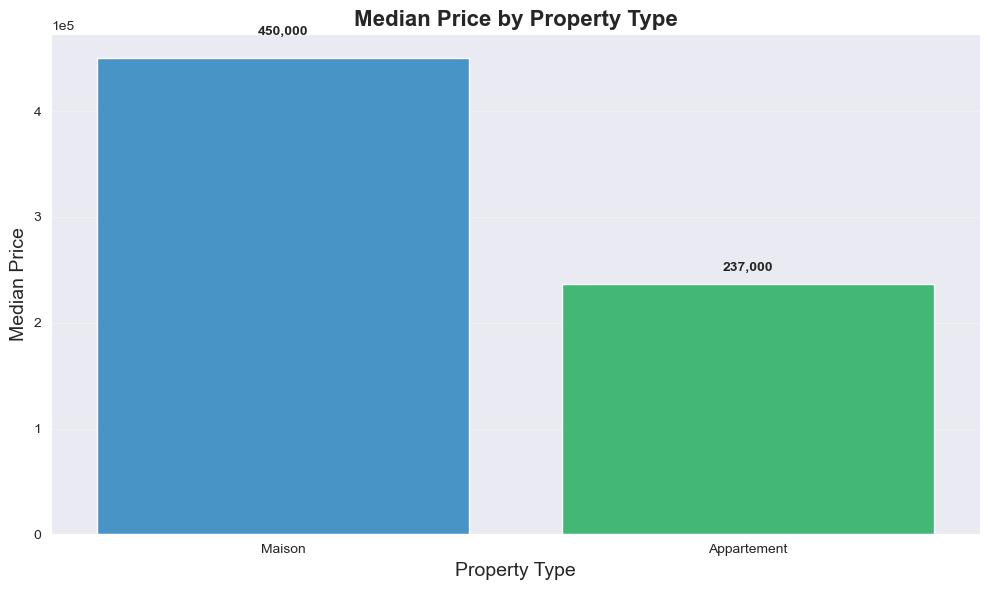

In [23]:
# Compare median prices (more robust to outliers than mean)
plt.figure(figsize=(10, 6))
median_prices = df.groupby('property_type')['price'].median().sort_values(ascending=False)
ax = sns.barplot(x=median_prices.index, y=median_prices.values, palette=['#3498db', '#2ecc71'])

# Add data labels on top of bars
for i, v in enumerate(median_prices.values):
    ax.text(i, v + v*0.05, f"{v:,.0f}", ha='center', fontweight='bold')

plt.title('Median Price by Property Type', fontsize=16, fontweight='bold')
plt.xlabel('Property Type', fontsize=14)
plt.ylabel('Median Price', fontsize=14)
plt.ticklabel_format(style='sci', axis='y', scilimits=(0,0))
plt.grid(True, alpha=0.3, axis='y')
plt.tight_layout()
plt.show()

For a more detailed view of the price distributions, let's create a log-transformed histogram:

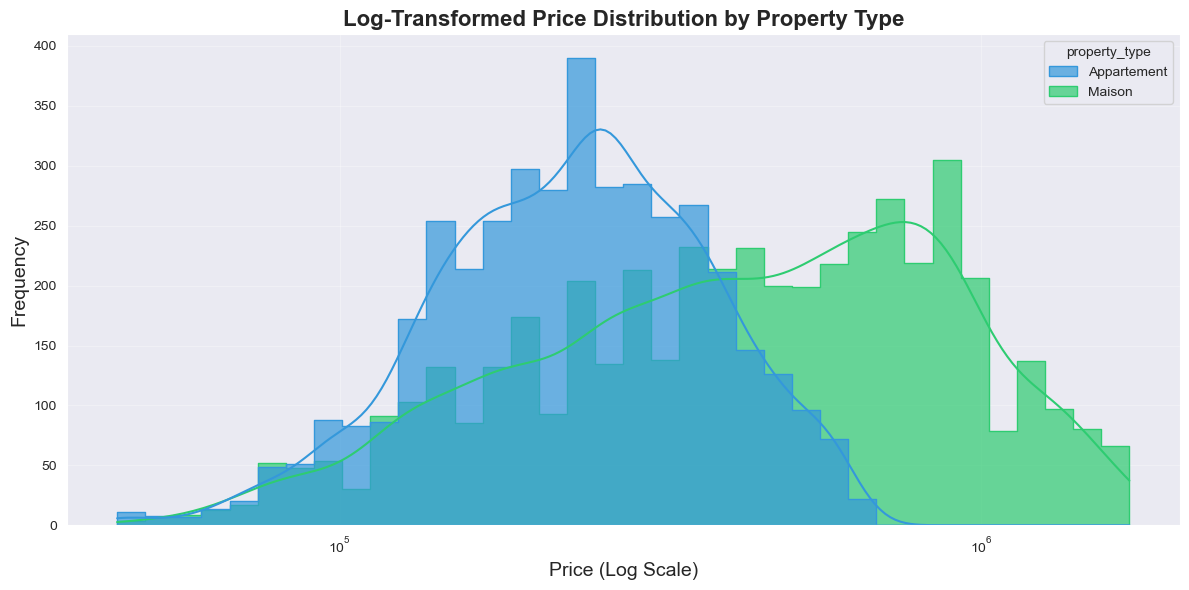

In [24]:
# Log-transformed price comparison
plt.figure(figsize=(12, 6))
sns.histplot(data=df, x='price', hue='property_type', element='step', 
             log_scale=True, palette=['#3498db', '#2ecc71'], common_norm=False, 
             alpha=0.7, kde=True)
plt.title('Log-Transformed Price Distribution by Property Type', fontsize=16, fontweight='bold')
plt.xlabel('Price (Log Scale)', fontsize=14)
plt.ylabel('Frequency', fontsize=14)
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()

In [25]:
df.shape

(8776, 28)

## 3. Encoding Property Type for Modeling 🔢

For our predictive model, we'll need to convert the categorical property type into numerical features. Let's create binary dummy variables:

In [26]:
from sklearn.preprocessing import OneHotEncoder

# Initialize OneHotEncoder with drop='first' to get single binary column
encoder = OneHotEncoder(drop='first', sparse_output=False)

# Transform property_type to binary column (1 for 'Maison', 0 for 'Appartement')
df['is_house'] = encoder.fit_transform(df[['property_type']])

# Print verification information
print("\nData types:")
print("is_house:", df['is_house'].dtype)

print("\nEncoder categories:")
print(encoder.categories_)

print("\nValue counts for property_type before removal:")
print(df['property_type'].value_counts())

print("\nValue counts for is_house:")
print(df['is_house'].value_counts())

# Calculate apartment counts (0 in is_house represents apartments)
print("\nApartment counts (is_house == 0):")
print("Total apartments:", (df['is_house'] == 0).sum())
apartment_percentage = (df['is_house'] == 0).mean() * 100
print("Percentage apartments: {:.1f}%".format(apartment_percentage))



print("\nConfirming property_type column has been removed:")
print(df.columns.tolist())


Data types:
is_house: float64

Encoder categories:
[array(['Appartement', 'Maison'], dtype=object)]

Value counts for property_type before removal:
property_type
Maison         4734
Appartement    4042
Name: count, dtype: int64

Value counts for is_house:
is_house
1.0    4734
0.0    4042
Name: count, dtype: int64

Apartment counts (is_house == 0):
Total apartments: 4042
Percentage apartments: 46.1%

Confirming property_type column has been removed:
['price', 'property_type', 'bedrooms', 'bathrooms', 'total_rooms', 'living_area', 'land_area', 'construction_year', 'neighborhood', 'city', 'climatisation', 'parabole_tv', 'pool', 'handicapped_access', 'parking', 'garage', 'garden', 'fireplace', 'interphone', 'terrace', 'electric_heating', 'elevator', 'alarm_system', 'internet_access', 'sea_view', 'furnished', 'central_heating', 'kitchen_equipped', 'is_house']


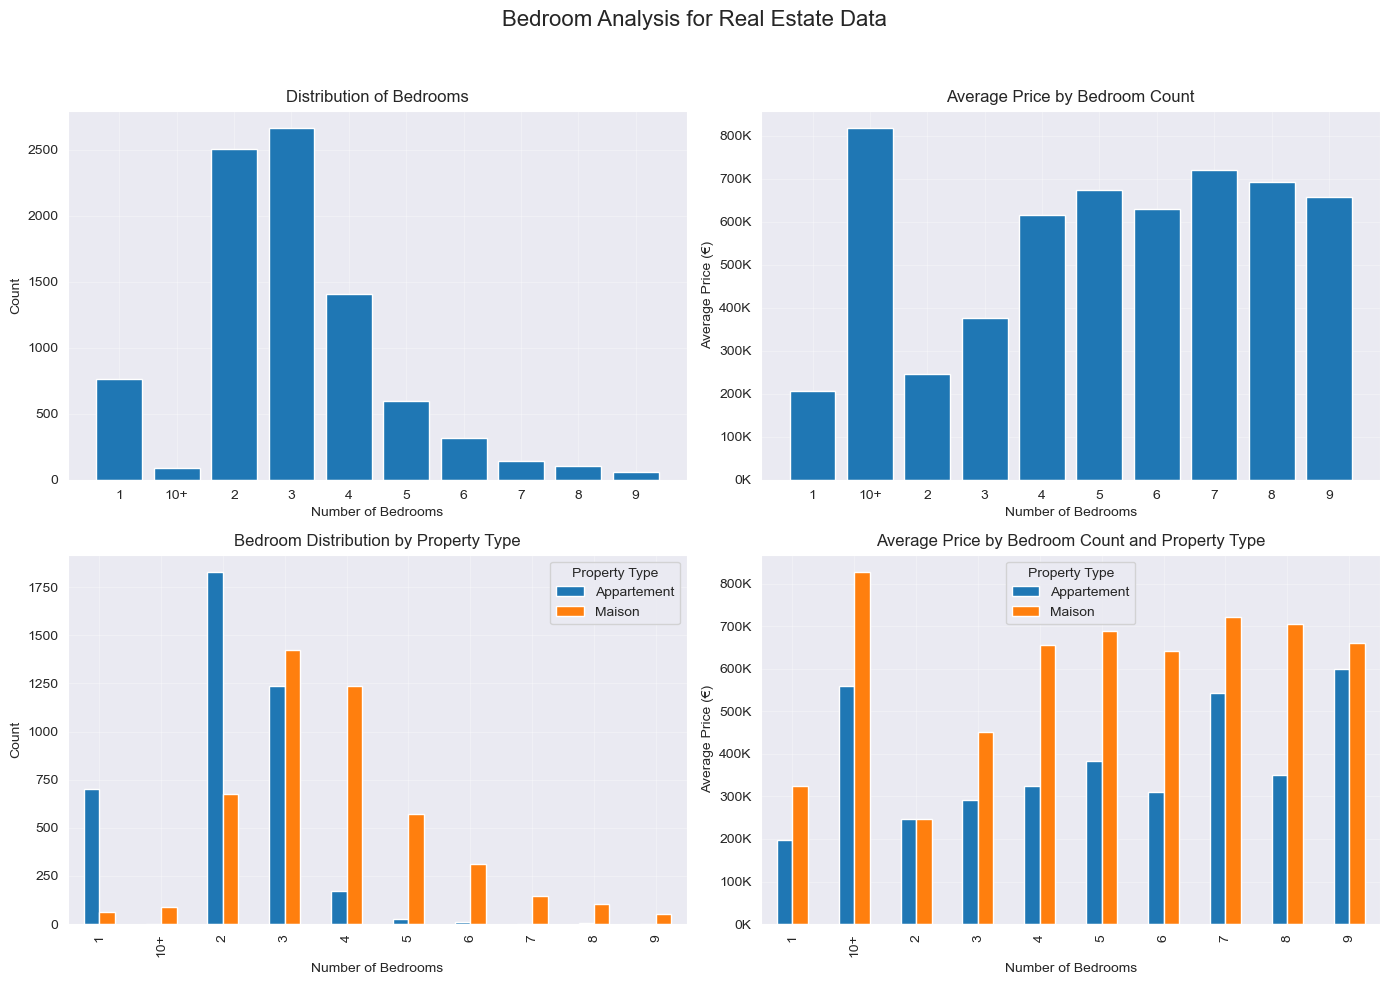

Basic statistics for bedrooms column after processing:
count     8669
unique      10
top          3
freq      2662
Name: bedrooms, dtype: object

Average price by bedroom count:
bedrooms
1      207765.971279
10+    818330.967742
2      247166.633786
3      377496.287002
4      615397.939716
5      673293.400000
6      630417.445483
7      720931.972789
8      693247.706422
9      658754.385965
Name: price, dtype: float64

Average price by property type and bedroom count:
property_type    Appartement         Maison
bedrooms                                   
1              196880.077033  325166.153846
10+            560000.000000  826942.000000
2              247326.197484  246735.150888
3              292156.301856  451801.446240
4              325727.586207  656176.775890
5              383000.000000  688036.847636
6              310500.000000  640704.180064
7              544000.000000  722143.835616
8              350000.000000  706323.809524
9              600000.000000  660890.909

In [27]:
# 2. Create basic plots
# Set up figure with subplots
fig, axes = plt.subplots(2, 2, figsize=(14, 10))
fig.suptitle('Bedroom Analysis for Real Estate Data', fontsize=16)

# Plot 1: Bedroom count distribution
bedroom_counts = df['bedrooms'].value_counts().sort_index()
axes[0, 0].bar(bedroom_counts.index, bedroom_counts.values)
axes[0, 0].set_title('Distribution of Bedrooms')
axes[0, 0].set_xlabel('Number of Bedrooms')
axes[0, 0].set_ylabel('Count')
axes[0, 0].grid(alpha=0.3)

# Plot 2: Average price by bedroom count
avg_price = df.groupby('bedrooms')['price'].mean()
axes[0, 1].bar(avg_price.index, avg_price.values)
axes[0, 1].set_title('Average Price by Bedroom Count')
axes[0, 1].set_xlabel('Number of Bedrooms')
axes[0, 1].set_ylabel('Average Price (€)')
axes[0, 1].grid(alpha=0.3)
# Format y-axis to show prices in thousands/millions
axes[0, 1].get_yaxis().set_major_formatter(
    plt.FuncFormatter(lambda x, loc: f"{int(x/1000):,}K" if x < 1000000 else f"{x/1000000:.1f}M"))

# Plot 3: Bedroom distribution by property type
bedroom_by_type = pd.crosstab(df['bedrooms'], df['property_type'])
bedroom_by_type.plot(kind='bar', ax=axes[1, 0])
axes[1, 0].set_title('Bedroom Distribution by Property Type')
axes[1, 0].set_xlabel('Number of Bedrooms')
axes[1, 0].set_ylabel('Count')
axes[1, 0].grid(alpha=0.3)
axes[1, 0].legend(title='Property Type')

# Plot 4: Average price by bedroom count and property type
avg_price_by_type = df.groupby(['bedrooms', 'property_type'])['price'].mean().unstack()
avg_price_by_type.plot(kind='bar', ax=axes[1, 1])
axes[1, 1].set_title('Average Price by Bedroom Count and Property Type')
axes[1, 1].set_xlabel('Number of Bedrooms')
axes[1, 1].set_ylabel('Average Price (€)')
axes[1, 1].grid(alpha=0.3)
axes[1, 1].legend(title='Property Type')
# Format y-axis to show prices in thousands/millions
axes[1, 1].get_yaxis().set_major_formatter(
    plt.FuncFormatter(lambda x, loc: f"{int(x/1000):,}K" if x < 1000000 else f"{x/1000000:.1f}M"))

plt.tight_layout(rect=[0, 0, 1, 0.95])  # Adjust layout to make room for the title
plt.savefig('bedroom_analysis.png', dpi=300, bbox_inches='tight')
plt.show()

# Print some basic statistics
print("Basic statistics for bedrooms column after processing:")
print(df['bedrooms'].describe())

print("\nAverage price by bedroom count:")
print(avg_price)

print("\nAverage price by property type and bedroom count:")
print(avg_price_by_type)

In [28]:
# Step 1: Create a flag for properties with 10+ bedrooms
# -----------------------------------------------------
# This creates a binary indicator (1 or 0) to preserve the information
# that some properties have "many" bedrooms (10+)
df['has_many_bedrooms'] = df['bedrooms'].apply(lambda x: 1 if x == '10+' else 0)

# Step 2: Convert string bedroom values to numeric
# -----------------------------------------------------
# Define a function that handles different cases:
# - Preserves NaN values
# - Converts '10+' to exactly 10
# - Converts all other values to floats
def convert_bedrooms(value):
    if pd.isna(value):  # Keep null values as NaN
        return np.nan
    elif value == '10+':
        return 10       # Convert '10+' to 10
    else:
        return float(value)  # Convert other string values to float

# Apply the conversion function to transform the bedroom column
df['bedrooms'] = df['bedrooms'].apply(convert_bedrooms)

# Step 3: Handle missing values with property-type-specific imputation
# -------------------------------------------------------------------
# For each property type (Appartement/Maison), find the median bedroom count
# and use that value to fill missing entries within that group
df['bedrooms'] = df.groupby('property_type')['bedrooms'].transform(lambda x: x.fillna(x.median()))

# Step 4: Convert to integer type
# -------------------------------
# Since fractional bedrooms don't make logical sense, convert to integers
# This is done after imputation to ensure we don't lose precision during the median calculation
df['bedrooms'] = df['bedrooms'].astype(int)

In [29]:
df[df['has_many_bedrooms']==1]


,price,property_type,bedrooms,bathrooms,total_rooms,living_area,land_area,construction_year,neighborhood,city,...,electric_heating,elevator,alarm_system,internet_access,sea_view,furnished,central_heating,kitchen_equipped,is_house,has_many_bedrooms
3764,500000.0,Appartement,10,6+,10+,800.0,0.0,1998.0,Kairouan Sud,Kairouan,...,1,1,1,1,1,1,1,1,0.0,1
4303,580000.0,Appartement,10,6+,10+,1122.0,1122.0,1999.0,Kairouan Sud,Kairouan,...,1,1,1,1,1,1,1,1,0.0,1
4754,600000.0,Appartement,10,6+,10+,600.0,355.0,2019.0,Hammam Sousse,Sousse,...,1,1,0,0,1,1,0,1,0.0,1
7078,620000.0,Maison,10,3,10+,600.0,600.0,NaN,Sidi El Béchir,Tunis,...,1,1,1,1,1,1,1,0,1.0,1
7164,780000.0,Maison,10,2,10+,270.0,360.0,2014.0,Manouba Ville,Manouba,...,1,0,1,1,1,1,1,1,1.0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14249,280000.0,Maison,10,3,10+,110.0,126.0,2006.0,Grombalia,Nabeul,...,1,1,1,0,1,1,1,1,1.0,1
14263,950000.0,Maison,10,4,10+,430.0,553.0,NaN,Le Bardo,Tunis,...,1,1,1,1,1,1,1,1,1.0,1
14264,1200000.0,Maison,10,6+,10+,600.0,392.0,2015.0,Monastir,Monastir,...,1,1,1,1,1,1,0,0,1.0,1
14300,420000.0,Maison,10,6+,10+,1200.0,600.0,2013.0,Kala' Kebira,Sousse,...,1,1,1,1,1,1,1,1,1.0,1


In [30]:
 df['bedrooms'].describe()

count    8776.000000
mean        3.190064
std         1.644917
min         1.000000
25%         2.000000
50%         3.000000
75%         4.000000
max        10.000000
Name: bedrooms, dtype: float64

In [31]:
df['bathrooms'].unique()

array([nan, '1', '2', '3', '5', '4', '6+'], dtype=object)

In [32]:
# First, replace NaN values with '1' (most common value)
df['bathrooms'] = df['bathrooms'].fillna('1')

# Create a binary feature for "many bathrooms"
df['many_bathrooms'] = (df['bathrooms'] == '6+').astype(int)

# Replace '6+' with '6' in the original column
df['bathrooms'] = df['bathrooms'].replace('6+', '6')

# Convert bathrooms to numeric
df['bathrooms'] = pd.to_numeric(df['bathrooms'])

# Verify the conversion
print("Unique values in bathrooms column after conversion:")
print(df['bathrooms'].unique())
print("\nCount of properties with many bathrooms (6+):")
print(df['many_bathrooms'].sum())

Unique values in bathrooms column after conversion:
[1 2 3 5 4 6]

Count of properties with many bathrooms (6+):
53



Basic statistics for bathrooms column after processing:
count    8776.000000
mean        1.697470
std         0.993069
min         1.000000
25%         1.000000
50%         1.000000
75%         2.000000
max         6.000000
Name: bathrooms, dtype: float64

Average price by bathroom count:
bathrooms
1    271681.376156
2    461977.403872
3    716048.642127
4    844777.397260
5    963608.947368
6    938509.433962
Name: price, dtype: float64

Average price by property type and bathroom count:
property_type    Appartement         Maison
bathrooms                                  
1              233248.930603  340946.386479
2              336077.889039  522629.125815
3              440412.133333  743984.774775
4              320714.285714  855024.441341
5              570000.000000  969618.244275
6              512000.000000  982937.500000

Correlation between bathrooms and price:
Correlation coefficient: 0.6036


<Figure size 640x480 with 0 Axes>

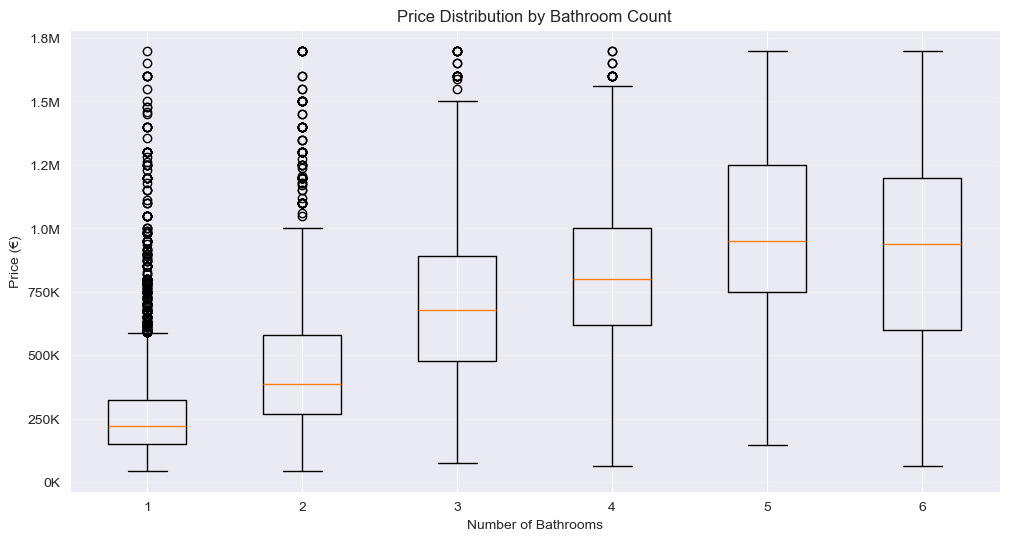

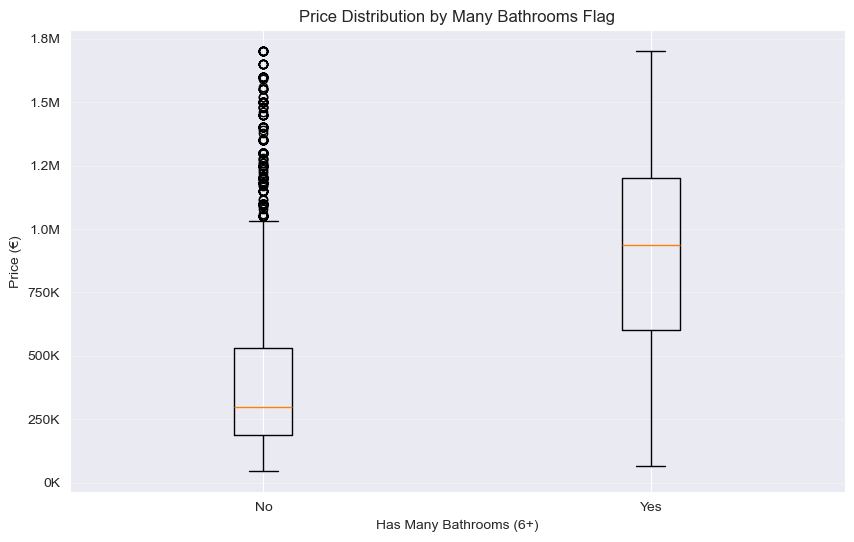

<Figure size 1200x600 with 0 Axes>

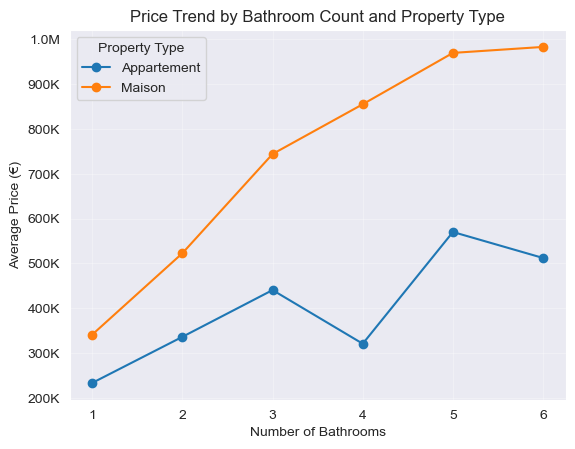

In [33]:
# Plot 1: Bathroom count distribution
bathroom_counts = df['bathrooms'].value_counts().sort_index()
axes[0, 0].bar(bathroom_counts.index, bathroom_counts.values, color='skyblue')
axes[0, 0].set_title('Distribution of Bathrooms')
axes[0, 0].set_xlabel('Number of Bathrooms')
axes[0, 0].set_ylabel('Count')
axes[0, 0].grid(alpha=0.3)
axes[0, 0].set_xticks(range(1, int(df['bathrooms'].max()) + 1))

# Plot 2: Average price by bathroom count
avg_price = df.groupby('bathrooms')['price'].mean()
axes[0, 1].bar(avg_price.index, avg_price.values, color='lightgreen')
axes[0, 1].set_title('Average Price by Bathroom Count')
axes[0, 1].set_xlabel('Number of Bathrooms')
axes[0, 1].set_ylabel('Average Price (€)')
axes[0, 1].grid(alpha=0.3)
axes[0, 1].set_xticks(range(1, int(df['bathrooms'].max()) + 1))
# Format y-axis to show prices in thousands/millions
axes[0, 1].get_yaxis().set_major_formatter(
    plt.FuncFormatter(lambda x, loc: f"{int(x/1000):,}K" if x < 1000000 else f"{x/1000000:.1f}M"))

# Plot 3: Bathroom distribution by property type
bathroom_by_type = pd.crosstab(df['bathrooms'], df['property_type'])
bathroom_by_type.plot(kind='bar', ax=axes[1, 0], colormap='viridis')
axes[1, 0].set_title('Bathroom Distribution by Property Type')
axes[1, 0].set_xlabel('Number of Bathrooms')
axes[1, 0].set_ylabel('Count')
axes[1, 0].grid(alpha=0.3)
axes[1, 0].legend(title='Property Type')

# Plot 4: Average price by bathroom count and property type
avg_price_by_type = df.groupby(['bathrooms', 'property_type'])['price'].mean().unstack()
avg_price_by_type.plot(kind='bar', ax=axes[1, 1], colormap='viridis')
axes[1, 1].set_title('Average Price by Bathroom Count and Property Type')
axes[1, 1].set_xlabel('Number of Bathrooms')
axes[1, 1].set_ylabel('Average Price (€)')
axes[1, 1].grid(alpha=0.3)
axes[1, 1].legend(title='Property Type')
# Format y-axis to show prices in thousands/millions
axes[1, 1].get_yaxis().set_major_formatter(
    plt.FuncFormatter(lambda x, loc: f"{int(x/1000):,}K" if x < 1000000 else f"{x/1000000:.1f}M"))

plt.tight_layout(rect=[0, 0, 1, 0.95])  # Adjust layout to make room for the title
plt.savefig('bathroom_analysis.png', dpi=300, bbox_inches='tight')

# Additional analysis: Create a boxplot showing price distribution by bathroom count
plt.figure(figsize=(12, 6))
df_sorted = df.sort_values('bathrooms')
plt.boxplot([df_sorted[df_sorted['bathrooms'] == i]['price'] for i in sorted(df['bathrooms'].unique())])
plt.title('Price Distribution by Bathroom Count')
plt.xlabel('Number of Bathrooms')
plt.ylabel('Price (€)')
plt.grid(axis='y', alpha=0.3)
plt.xticks(range(1, len(df['bathrooms'].unique()) + 1), sorted(df['bathrooms'].unique()))
plt.gca().get_yaxis().set_major_formatter(
    plt.FuncFormatter(lambda x, loc: f"{int(x/1000):,}K" if x < 1000000 else f"{x/1000000:.1f}M"))
plt.savefig('bathroom_boxplot.png', dpi=300, bbox_inches='tight')

# Show the impact of many_bathrooms flag on price
plt.figure(figsize=(10, 6))
many_bath_data = [df[df['many_bathrooms'] == 0]['price'], df[df['many_bathrooms'] == 1]['price']]
plt.boxplot(many_bath_data)
plt.title('Price Distribution by Many Bathrooms Flag')
plt.xlabel('Has Many Bathrooms (6+)')
plt.ylabel('Price (€)')
plt.xticks([1, 2], ['No', 'Yes'])
plt.grid(axis='y', alpha=0.3)
plt.gca().get_yaxis().set_major_formatter(
    plt.FuncFormatter(lambda x, loc: f"{int(x/1000):,}K" if x < 1000000 else f"{x/1000000:.1f}M"))
plt.savefig('many_bathrooms_boxplot.png', dpi=300, bbox_inches='tight')

# Print statistical summaries
print("\nBasic statistics for bathrooms column after processing:")
print(df['bathrooms'].describe())

print("\nAverage price by bathroom count:")
print(avg_price)

print("\nAverage price by property type and bathroom count:")
print(avg_price_by_type)

print("\nCorrelation between bathrooms and price:")
print(f"Correlation coefficient: {df['bathrooms'].corr(df['price']):.4f}")

# Line chart showing price trend by bathroom count for each property type
plt.figure(figsize=(12, 6))
avg_price_by_type.plot(kind='line', marker='o')
plt.title('Price Trend by Bathroom Count and Property Type')
plt.xlabel('Number of Bathrooms')
plt.ylabel('Average Price (€)')
plt.grid(alpha=0.3)
plt.legend(title='Property Type')
plt.gca().get_yaxis().set_major_formatter(
    plt.FuncFormatter(lambda x, loc: f"{int(x/1000):,}K" if x < 1000000 else f"{x/1000000:.1f}M"))
plt.savefig('bathroom_price_trend.png', dpi=300, bbox_inches='tight')

# Display results
plt.show()

In [34]:
df.info()


<class 'pandas.core.frame.DataFrame'>
Index: 8776 entries, 1 to 14348
Data columns (total 31 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   price               8776 non-null   float64
 1   property_type       8776 non-null   object 
 2   bedrooms            8776 non-null   int64  
 3   bathrooms           8776 non-null   int64  
 4   total_rooms         7019 non-null   object 
 5   living_area         8776 non-null   float64
 6   land_area           8776 non-null   float64
 7   construction_year   2622 non-null   float64
 8   neighborhood        8774 non-null   object 
 9   city                8774 non-null   object 
 10  climatisation       8776 non-null   int64  
 11  parabole_tv         8776 non-null   int64  
 12  pool                8776 non-null   int64  
 13  handicapped_access  8776 non-null   int64  
 14  parking             8776 non-null   int64  
 15  garage              8776 non-null   int64  
 16  garden    

Original unique values in total_rooms column:
['4' nan '3' '2' '5' '1' '6' '9' '7' '8' '10+' '193' '11' '12' '71994']
Number of null values in total_rooms: 1757

Unique values in total_rooms after conversion:
[np.int64(4), np.int64(5), np.int64(6), np.int64(7), np.int64(8), np.int64(9), np.int64(10)]

Count of properties with many rooms (≥10): 1173

Basic statistics for total_rooms column after processing:
count    8776.000000
mean        6.679809
std         1.861662
min         4.000000
25%         5.000000
50%         6.000000
75%         8.000000
max        10.000000
Name: total_rooms, dtype: float64

Average price by total rooms count:
total_rooms
4     203861.491299
5     231956.453725
6     300027.052394
7     420794.964723
8     570110.493429
9     681062.203125
10    760268.985507
Name: price, dtype: float64

Average price by property type and total rooms count:
                 Apartment          House
total_rooms                              
4            196283.455604  2906

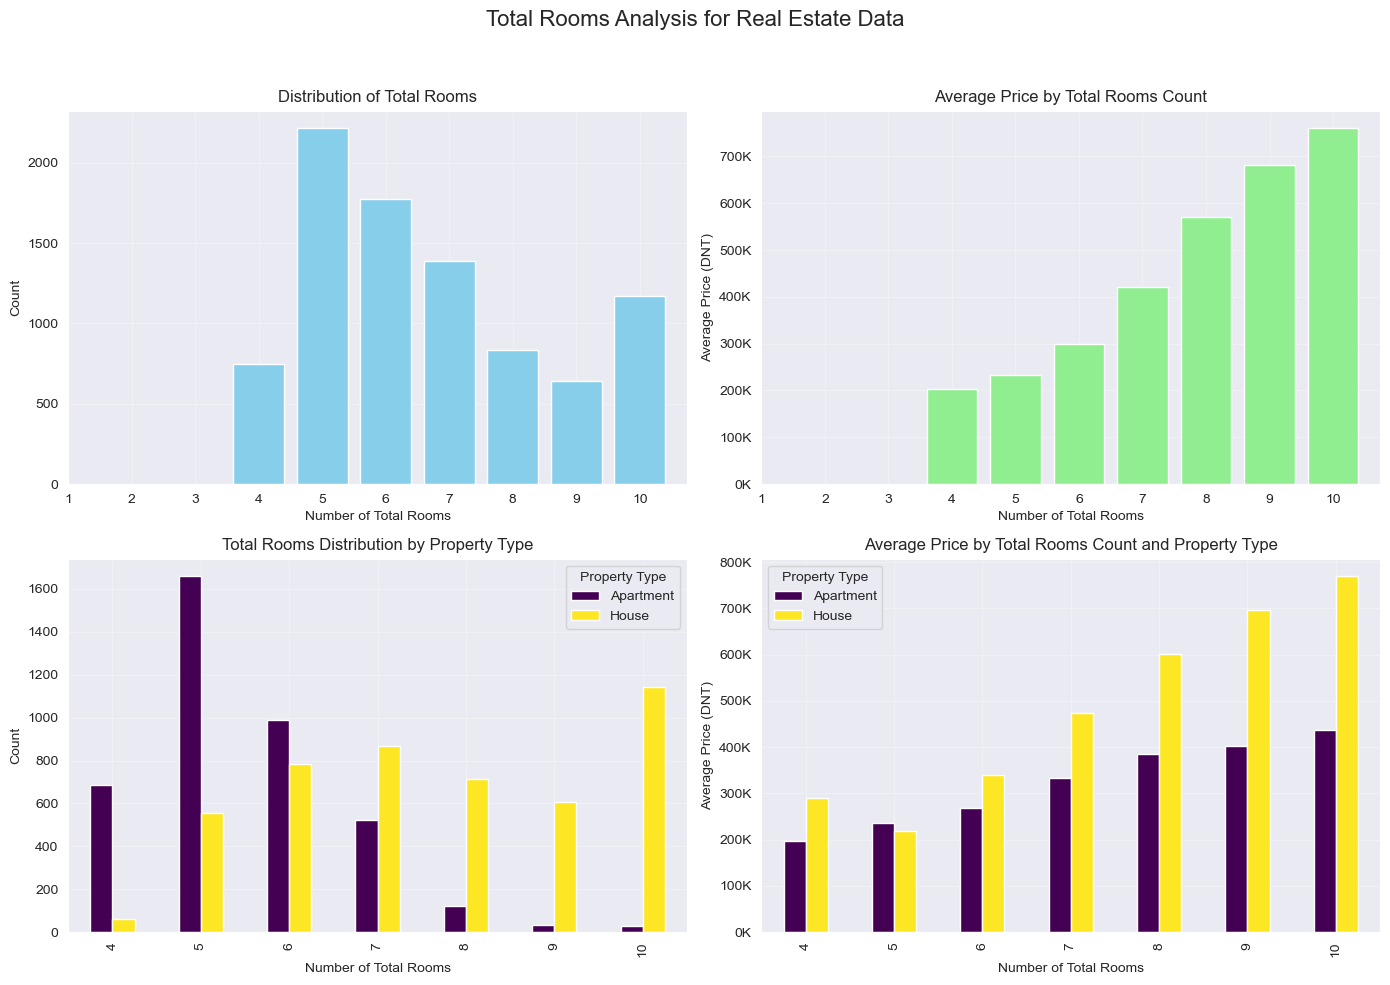

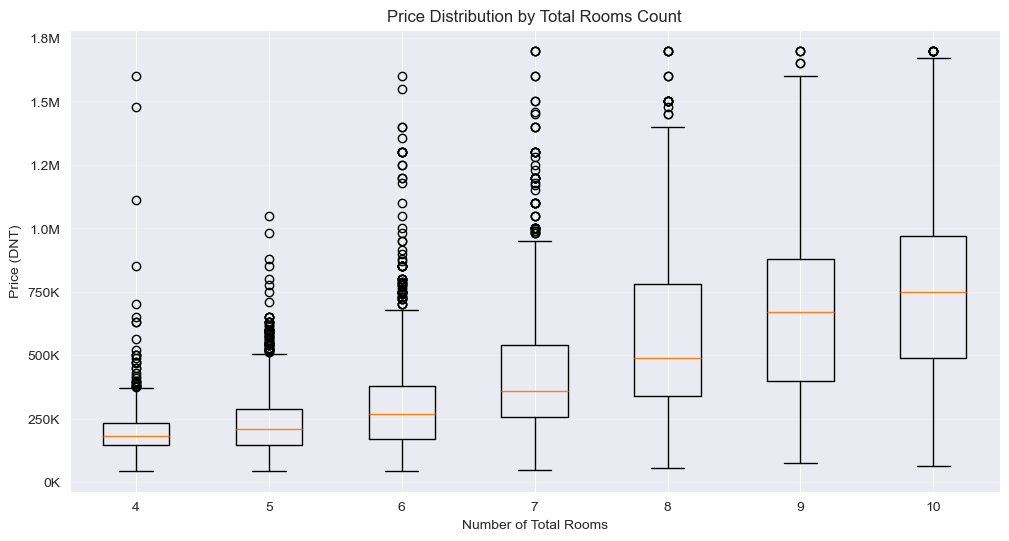

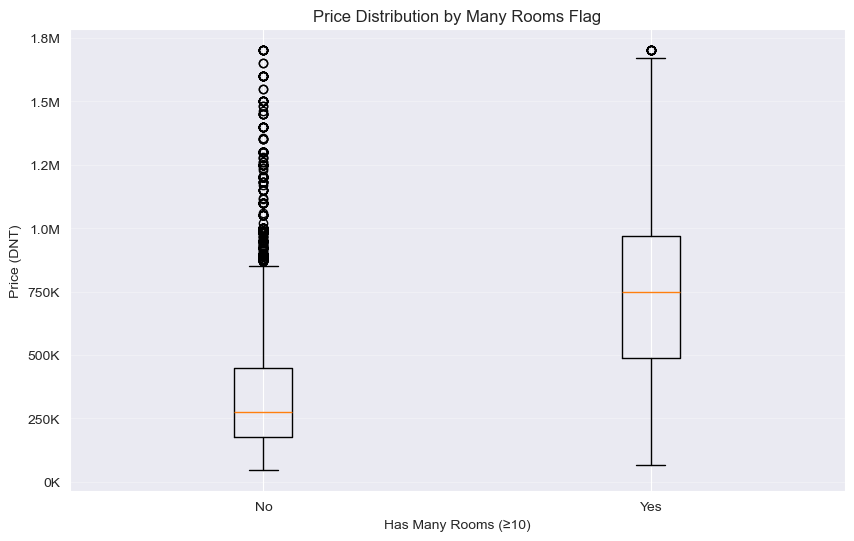

<Figure size 1200x600 with 0 Axes>

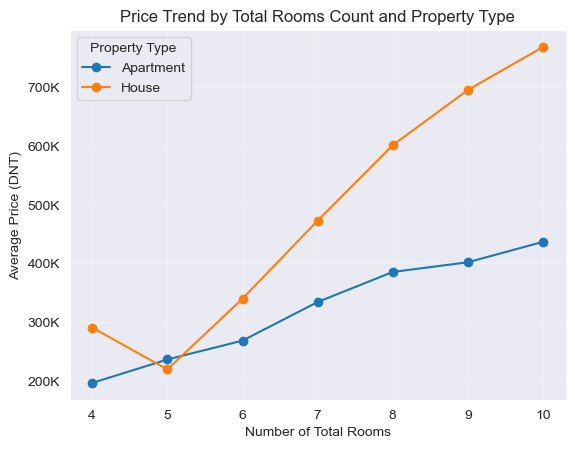

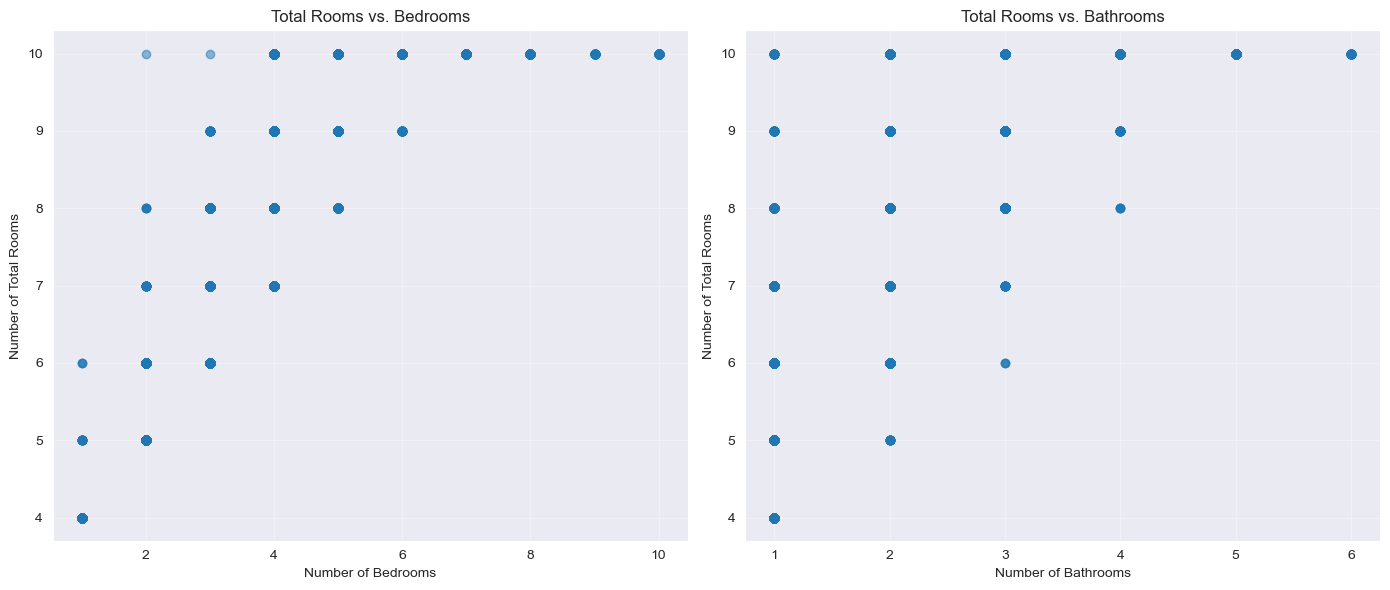

In [35]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Display original unique values
print("Original unique values in total_rooms column:")
print(df['total_rooms'].unique())

# First, check how many null values we have
null_count = df['total_rooms'].isnull().sum()
print(f"Number of null values in total_rooms: {null_count}")

# Create a copy of the total_rooms column for safety
total_rooms_original = df['total_rooms'].copy()

# Make sure bedrooms and bathrooms are numeric
for col in ['bedrooms', 'bathrooms']:
    if df[col].dtype == 'object':
        df[col] = pd.to_numeric(df[col], errors='coerce')

# Calculate total_rooms as the sum of bedrooms + bathrooms + 2
# This will correctly handle all cases including when total_rooms was originally null
df['total_rooms'] = df['bedrooms'] + df['bathrooms'] + 2

# Cap values at 10 (for any value greater than 10)
df.loc[df['total_rooms'] > 10, 'total_rooms'] = 10

# Create a binary feature for "many rooms" (when total_rooms >= 10)
df['has_many_total_rooms'] = (df['total_rooms'] >= 10).astype(int)

# Verify the conversion
print("\nUnique values in total_rooms after conversion:")
print(sorted(df['total_rooms'].unique()))
print(f"\nCount of properties with many rooms (≥10): {df['has_many_total_rooms'].sum()}")

# Create visualization plots
# Set up figure with subplots
fig, axes = plt.subplots(2, 2, figsize=(14, 10))
fig.suptitle('Total Rooms Analysis for Real Estate Data', fontsize=16)

# Plot 1: Total rooms count distribution
room_counts = df['total_rooms'].value_counts().sort_index()
axes[0, 0].bar(room_counts.index, room_counts.values, color='skyblue')
axes[0, 0].set_title('Distribution of Total Rooms')
axes[0, 0].set_xlabel('Number of Total Rooms')
axes[0, 0].set_ylabel('Count')
axes[0, 0].grid(alpha=0.3)
axes[0, 0].set_xticks(range(1, int(df['total_rooms'].max()) + 1))

# Plot 2: Average price by total rooms count
avg_price = df.groupby('total_rooms')['price'].mean()
axes[0, 1].bar(avg_price.index, avg_price.values, color='lightgreen')
axes[0, 1].set_title('Average Price by Total Rooms Count')
axes[0, 1].set_xlabel('Number of Total Rooms')
axes[0, 1].set_ylabel('Average Price (DNT)')
axes[0, 1].grid(alpha=0.3)
axes[0, 1].set_xticks(range(1, int(df['total_rooms'].max()) + 1))
# Format y-axis to show prices in thousands/millions
axes[0, 1].get_yaxis().set_major_formatter(
    plt.FuncFormatter(lambda x, loc: f"{int(x/1000):,}K" if x < 1000000 else f"{x/1000000:.1f}M"))

# Plot 3: Total rooms distribution by property type (using is_house instead of property_type)
rooms_by_type = pd.crosstab(df['total_rooms'], df['is_house'])
rooms_by_type.columns = ['Apartment', 'House']  # Rename for clarity (0=Apartment, 1=House)
rooms_by_type.plot(kind='bar', ax=axes[1, 0], colormap='viridis')
axes[1, 0].set_title('Total Rooms Distribution by Property Type')
axes[1, 0].set_xlabel('Number of Total Rooms')
axes[1, 0].set_ylabel('Count')
axes[1, 0].grid(alpha=0.3)
axes[1, 0].legend(title='Property Type')

# Plot 4: Average price by total rooms count and property type
avg_price_by_type = df.groupby(['total_rooms', 'is_house'])['price'].mean().unstack()
avg_price_by_type.columns = ['Apartment', 'House']  # Rename for clarity
avg_price_by_type.plot(kind='bar', ax=axes[1, 1], colormap='viridis')
axes[1, 1].set_title('Average Price by Total Rooms Count and Property Type')
axes[1, 1].set_xlabel('Number of Total Rooms')
axes[1, 1].set_ylabel('Average Price (DNT)')
axes[1, 1].grid(alpha=0.3)
axes[1, 1].legend(title='Property Type')
# Format y-axis to show prices in thousands/millions
axes[1, 1].get_yaxis().set_major_formatter(
    plt.FuncFormatter(lambda x, loc: f"{int(x/1000):,}K" if x < 1000000 else f"{x/1000000:.1f}M"))

plt.tight_layout(rect=[0, 0, 1, 0.95])  # Adjust layout to make room for the title
plt.savefig('total_rooms_analysis.png', dpi=300, bbox_inches='tight')

# Additional analysis: Create a boxplot showing price distribution by total rooms count
plt.figure(figsize=(12, 6))
df_sorted = df.copy().sort_values('total_rooms')
boxplot_data = [df_sorted[df_sorted['total_rooms'] == i]['price'] for i in sorted(df['total_rooms'].unique())]
# Only include groups with sufficient data
boxplot_data = [data for data in boxplot_data if len(data) >= 5]
plt.boxplot(boxplot_data)
plt.title('Price Distribution by Total Rooms Count')
plt.xlabel('Number of Total Rooms')
plt.ylabel('Price (DNT)')
plt.grid(axis='y', alpha=0.3)
plt.xticks(range(1, len(boxplot_data) + 1), sorted(df['total_rooms'].unique())[:len(boxplot_data)])
plt.gca().get_yaxis().set_major_formatter(
    plt.FuncFormatter(lambda x, loc: f"{int(x/1000):,}K" if x < 1000000 else f"{x/1000000:.1f}M"))
plt.savefig('total_rooms_boxplot.png', dpi=300, bbox_inches='tight')

# Show the impact of has_many_total_rooms flag on price
plt.figure(figsize=(10, 6))
many_rooms_data = [df[df['has_many_total_rooms'] == 0]['price'], df[df['has_many_total_rooms'] == 1]['price']]
plt.boxplot(many_rooms_data)
plt.title('Price Distribution by Many Rooms Flag')
plt.xlabel('Has Many Rooms (≥10)')
plt.ylabel('Price (DNT)')
plt.xticks([1, 2], ['No', 'Yes'])
plt.grid(axis='y', alpha=0.3)
plt.gca().get_yaxis().set_major_formatter(
    plt.FuncFormatter(lambda x, loc: f"{int(x/1000):,}K" if x < 1000000 else f"{x/1000000:.1f}M"))
plt.savefig('many_rooms_boxplot.png', dpi=300, bbox_inches='tight')

# Line chart showing price trend by total rooms count for each property type
plt.figure(figsize=(12, 6))
avg_price_by_type.plot(kind='line', marker='o')
plt.title('Price Trend by Total Rooms Count and Property Type')
plt.xlabel('Number of Total Rooms')
plt.ylabel('Average Price (DNT)')
plt.grid(alpha=0.3)
plt.legend(title='Property Type')
plt.gca().get_yaxis().set_major_formatter(
    plt.FuncFormatter(lambda x, loc: f"{int(x/1000):,}K" if x < 1000000 else f"{x/1000000:.1f}M"))
plt.savefig('total_rooms_price_trend.png', dpi=300, bbox_inches='tight')

# Relationship between total_rooms and bedrooms/bathrooms
plt.figure(figsize=(14, 6))
plt.subplot(1, 2, 1)
plt.scatter(df['bedrooms'], df['total_rooms'], alpha=0.5)
plt.title('Total Rooms vs. Bedrooms')
plt.xlabel('Number of Bedrooms')
plt.ylabel('Number of Total Rooms')
plt.grid(alpha=0.3)

plt.subplot(1, 2, 2)
plt.scatter(df['bathrooms'], df['total_rooms'], alpha=0.5)
plt.title('Total Rooms vs. Bathrooms')
plt.xlabel('Number of Bathrooms')
plt.ylabel('Number of Total Rooms')
plt.grid(alpha=0.3)
plt.tight_layout()
plt.savefig('rooms_relationships.png', dpi=300, bbox_inches='tight')

# Print statistical summaries
print("\nBasic statistics for total_rooms column after processing:")
print(df['total_rooms'].describe())

print("\nAverage price by total rooms count:")
print(avg_price)

print("\nAverage price by property type and total rooms count:")
print(avg_price_by_type)

print("\nCorrelation between total_rooms and price:")
print(f"Correlation coefficient: {df['total_rooms'].corr(df['price']):.4f}")

print("\nCorrelation between total_rooms and bedrooms:")
print(f"Correlation coefficient: {df['total_rooms'].corr(df['bedrooms']):.4f}")

print("\nCorrelation between total_rooms and bathrooms:")
print(f"Correlation coefficient: {df['total_rooms'].corr(df['bathrooms']):.4f}")

print("\nMany rooms distribution:")
print(df['has_many_total_rooms'].value_counts(normalize=True))

# Display all plots
plt.show()

In [36]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 8776 entries, 1 to 14348
Data columns (total 32 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   price                 8776 non-null   float64
 1   property_type         8776 non-null   object 
 2   bedrooms              8776 non-null   int64  
 3   bathrooms             8776 non-null   int64  
 4   total_rooms           8776 non-null   int64  
 5   living_area           8776 non-null   float64
 6   land_area             8776 non-null   float64
 7   construction_year     2622 non-null   float64
 8   neighborhood          8774 non-null   object 
 9   city                  8774 non-null   object 
 10  climatisation         8776 non-null   int64  
 11  parabole_tv           8776 non-null   int64  
 12  pool                  8776 non-null   int64  
 13  handicapped_access    8776 non-null   int64  
 14  parking               8776 non-null   int64  
 15  garage                877

In [37]:
df['has_many_total_rooms'].unique()

array([0, 1])

In [38]:
df['living_area'].describe()


count      8776.000000
mean        239.026993
std        3142.473274
min           0.000000
25%          90.000000
50%         131.000000
75%         220.000000
max      220000.000000
Name: living_area, dtype: float64

In [39]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 8776 entries, 1 to 14348
Data columns (total 32 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   price                 8776 non-null   float64
 1   property_type         8776 non-null   object 
 2   bedrooms              8776 non-null   int64  
 3   bathrooms             8776 non-null   int64  
 4   total_rooms           8776 non-null   int64  
 5   living_area           8776 non-null   float64
 6   land_area             8776 non-null   float64
 7   construction_year     2622 non-null   float64
 8   neighborhood          8774 non-null   object 
 9   city                  8774 non-null   object 
 10  climatisation         8776 non-null   int64  
 11  parabole_tv           8776 non-null   int64  
 12  pool                  8776 non-null   int64  
 13  handicapped_access    8776 non-null   int64  
 14  parking               8776 non-null   int64  
 15  garage                877

# Handling Missing Values in Land Area and Living Area

In this section, we'll implement a sophisticated approach to handle missing values in the `land_area` and `living_area` columns. Our strategy differs based on property type, recognizing that apartments and houses have fundamentally different characteristics.

## Understanding the Problem

Our dataset contains two related area measurements:
- **Living Area**: The interior usable space of the property
- **Land Area**: The total land area of the property

These fields have different relationships depending on property type:
- For **apartments**, living area and land area are often equivalent
- For **houses**, land area is typically larger than living area by some factor

## Our Imputation Strategy

### For Apartments (`property_type = 'Appartement'`)
- If `land_area` is null but `living_area` exists: set `land_area = living_area`
- If `living_area` is null but `land_area` exists: set `living_area = land_area`
- If both are null: impute with median values by property type

### For Houses (`property_type = 'Maison'`)
- If `land_area` is null but `living_area` exists: use ratio-based imputation
- If `living_area` is null but `land_area` exists: use ratio-based imputation
- If both are null: impute with median values by property type

## Ratio-Based Approach Explained

The ratio-based approach is a data-driven method that uses the typical relationship between land area and living area in our dataset to make more accurate imputations.

### How it works:

1. **Calculate the typical ratio**: First, we find the median ratio between land area and living area for all houses that have both values.

2. **Apply this ratio to estimate missing values**:
   - If land area is missing: `land_area = living_area × median_ratio`
   - If living area is missing: `living_area = land_area ÷ median_ratio`

### Example:

If we calculate that for houses, the median land area is typically 3 times the living area, then:
- For a house with living area = 100m² but missing land area, we'd estimate: 
  land area = 100m² × 3 = 300m²
- For a house with land area = 600m² but missing living area, we'd estimate: 
  living area = 600m² ÷ 3 = 200m²

## Advantages of Our Approach

1. **Data-driven**: Uses actual patterns in the dataset rather than arbitrary rules
2. **Property-type specific**: Acknowledges different relationships between variables based on property type
3. **Preserves relationships**: Maintains natural correlations between area measurements
4. **More accurate**: Produces more realistic estimates than simple mean/median imputation

This method leverages the correlation between related features, resulting in imputed values that maintain the statistical properties of our dataset.

Before imputation:
Zero values in living_area: 751
Zero values in land_area: 3018
For houses, median land area is 1.36 times the living area
For houses, median living area is 0.73 times the land area

After imputation:
Zero values in living_area: 0
Zero values in land_area: 0

Living area to land area ratio by property type:
                count      mean        std       min       25%       50%  75%  \
property_type                                                                   
Appartement    4042.0  1.556289   8.572655  0.000380  1.000000  1.000000  1.0   
Maison         4734.0  2.193059  19.159484  0.000583  0.575359  0.733333  1.0   

                      max  
property_type              
Appartement    260.000000  
Maison         686.714286  


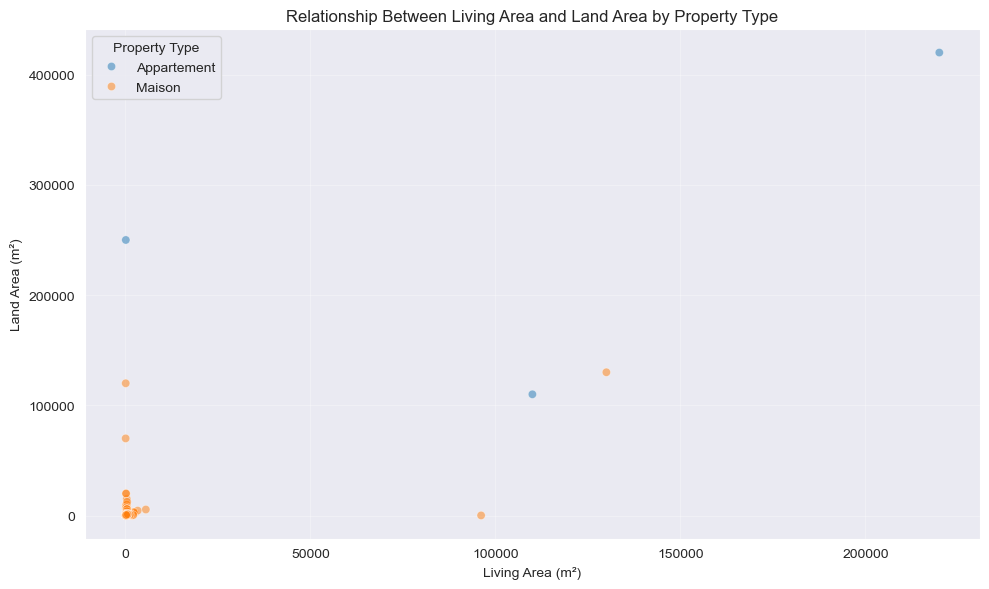

In [40]:
# Step 1: Check for zero values in both columns before processing
# --------------------------------------------------------------
print("Before imputation:")
print(f"Zero values in living_area: {(df['living_area'] == 0.0).sum()}")
print(f"Zero values in land_area: {(df['land_area'] == 0.0).sum()}")

# Step 2: Convert zeros to NaN for processing
# ------------------------------------------
# This makes the processing easier while preserving the original data structure
df_working = df.copy()
df_working.loc[df_working['living_area'] == 0.0, 'living_area'] = np.nan
df_working.loc[df_working['land_area'] == 0.0, 'land_area'] = np.nan

# Step 3: Calculate the median ratios for houses
# ----------------------------------------------
houses = df_working[df_working['property_type'] == 'Maison'].dropna(subset=['land_area', 'living_area'])
land_to_living_ratio = houses['land_area'].median() / houses['living_area'].median()
living_to_land_ratio = houses['living_area'].median() / houses['land_area'].median()

print(f"For houses, median land area is {land_to_living_ratio:.2f} times the living area")
print(f"For houses, median living area is {living_to_land_ratio:.2f} times the land area")

# Step 4: Define a function to handle zero/missing values based on property type
# ----------------------------------------------------------------------------
def impute_area(row):
    # Make a copy of the row to avoid modifying the original
    result = row.copy()
    
    # Case 1: Apartment with zero/missing land_area
    if row['property_type'] == 'Appartement' and pd.isnull(row['land_area']) and not pd.isnull(row['living_area']):
        result['land_area'] = row['living_area']
    
    # Case 2: Apartment with zero/missing living_area
    elif row['property_type'] == 'Appartement' and pd.isnull(row['living_area']) and not pd.isnull(row['land_area']):
        result['living_area'] = row['land_area']
    
    # Case 3: House with zero/missing land_area
    elif row['property_type'] == 'Maison' and pd.isnull(row['land_area']) and not pd.isnull(row['living_area']):
        # For houses, land_area is typically larger than living_area
        result['land_area'] = row['living_area'] * land_to_living_ratio
    
    # Case 4: House with zero/missing living_area
    elif row['property_type'] == 'Maison' and pd.isnull(row['living_area']) and not pd.isnull(row['land_area']):
        # Reverse calculation using the appropriate ratio
        result['living_area'] = row['land_area'] * living_to_land_ratio
    
    return result

# Step 5: Apply the function to rows with zero/missing values
# ----------------------------------------------------------
# First identify rows that need imputation
mask = df_working['land_area'].isnull() | df_working['living_area'].isnull()
rows_to_impute = df_working[mask]

# Apply imputation function to those rows
if not rows_to_impute.empty:
    imputed_rows = rows_to_impute.apply(impute_area, axis=1)
    
    # Update the working dataframe with imputed values
    for idx in imputed_rows.index:
        df_working.loc[idx, 'land_area'] = imputed_rows.loc[idx, 'land_area']
        df_working.loc[idx, 'living_area'] = imputed_rows.loc[idx, 'living_area']

# Step 6: For any remaining null values, impute with median by property type
# -------------------------------------------------------------------------
# Handle any remaining missing living_area values with median by property type
if df_working['living_area'].isnull().sum() > 0:
    df_working['living_area'] = df_working.groupby('property_type')['living_area'].transform(
        lambda x: x.fillna(x.median()))

# Handle any remaining missing land_area values with median by property type
if df_working['land_area'].isnull().sum() > 0:
    df_working['land_area'] = df_working.groupby('property_type')['land_area'].transform(
        lambda x: x.fillna(x.median()))

# Step 7: Update the original dataframe with the imputed values
# ------------------------------------------------------------
df['living_area'] = df_working['living_area']
df['land_area'] = df_working['land_area']

# Step 8: Verify imputation success
# ---------------------------------
print("\nAfter imputation:")
print(f"Zero values in living_area: {(df['living_area'] == 0.0).sum()}")
print(f"Zero values in land_area: {(df['land_area'] == 0.0).sum()}")

# Step 9: Create and analyze the living_area to land_area ratio
# ------------------------------------------------------------
# This could be a useful feature for your model
df['area_ratio'] = df['living_area'] / df['land_area']

# Print summary statistics for the ratio by property type
print("\nLiving area to land area ratio by property type:")
print(df.groupby('property_type')['area_ratio'].describe())

# Step 10: Visualize the relationship between land_area and living_area
# --------------------------------------------------------------------
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df, x='living_area', y='land_area', hue='property_type', alpha=0.5)
plt.title('Relationship Between Living Area and Land Area by Property Type')
plt.xlabel('Living Area (m²)')
plt.ylabel('Land Area (m²)')
plt.grid(True, alpha=0.3)
plt.legend(title='Property Type')
plt.tight_layout()
plt.show()

In [41]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 8776 entries, 1 to 14348
Data columns (total 33 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   price                 8776 non-null   float64
 1   property_type         8776 non-null   object 
 2   bedrooms              8776 non-null   int64  
 3   bathrooms             8776 non-null   int64  
 4   total_rooms           8776 non-null   int64  
 5   living_area           8776 non-null   float64
 6   land_area             8776 non-null   float64
 7   construction_year     2622 non-null   float64
 8   neighborhood          8774 non-null   object 
 9   city                  8774 non-null   object 
 10  climatisation         8776 non-null   int64  
 11  parabole_tv           8776 non-null   int64  
 12  pool                  8776 non-null   int64  
 13  handicapped_access    8776 non-null   int64  
 14  parking               8776 non-null   int64  
 15  garage                877

In [42]:
# Check missing values in construction_year column
print(f"Total missing values in construction_year: {df['construction_year'].isna().sum()}")
print(f"Percentage of missing values: {(df['construction_year'].isna().mean() * 100):.2f}%")


Total missing values in construction_year: 6154
Percentage of missing values: 70.12%


In [43]:

# Create flag for missing construction year
df['is_missing_year'] = df['construction_year'].isnull().astype(int)

# Impute construction_year with median
median_year = df['construction_year'].median()
df['construction_year_imputed'] = df['construction_year'].fillna(median_year)

# Calculate building_age
df['building_age'] = 2025 - df['construction_year_imputed']

# Check columns
print(f"Null values in is_missing_year: {df['is_missing_year'].isnull().sum()}")
print(f"Null values in construction_year_imputed: {df['construction_year_imputed'].isnull().sum()}")
print(f"Null values in building_age: {df['building_age'].isnull().sum()}")

Null values in is_missing_year: 0
Null values in construction_year_imputed: 0
Null values in building_age: 0


In [44]:
df['is_missing_year'].value_counts()

is_missing_year
1    6154
0    2622
Name: count, dtype: int64

In [45]:
df['building_age'] .value_counts()

building_age
 10.0       6300
 5.0         224
 6.0         190
 7.0         168
 3.0         155
            ... 
 2001.0        1
 90.0          1
-17865.0       1
 1807.0        1
 1817.0        1
Name: count, Length: 91, dtype: int64

In [46]:
# Delete the problematic columns
df = df.drop(['construction_year', 'building_age','is_missing_year','construction_year_imputed'], axis=1)

# Verify the columns are removed
print("Columns after removal:", df.columns.tolist())

Columns after removal: ['price', 'property_type', 'bedrooms', 'bathrooms', 'total_rooms', 'living_area', 'land_area', 'neighborhood', 'city', 'climatisation', 'parabole_tv', 'pool', 'handicapped_access', 'parking', 'garage', 'garden', 'fireplace', 'interphone', 'terrace', 'electric_heating', 'elevator', 'alarm_system', 'internet_access', 'sea_view', 'furnished', 'central_heating', 'kitchen_equipped', 'is_house', 'has_many_bedrooms', 'many_bathrooms', 'has_many_total_rooms', 'area_ratio']


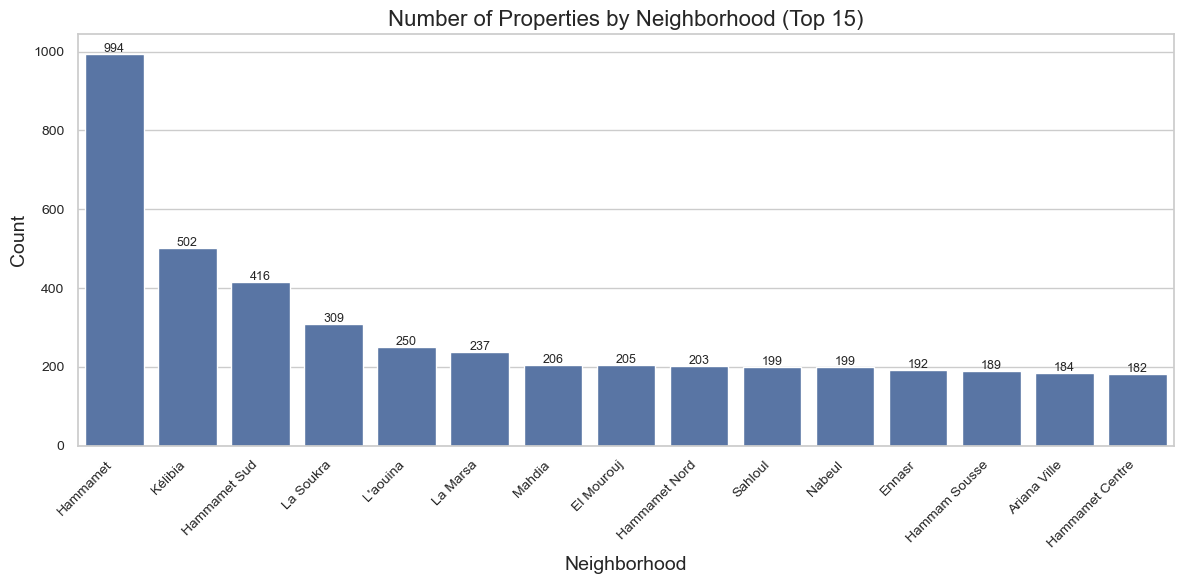

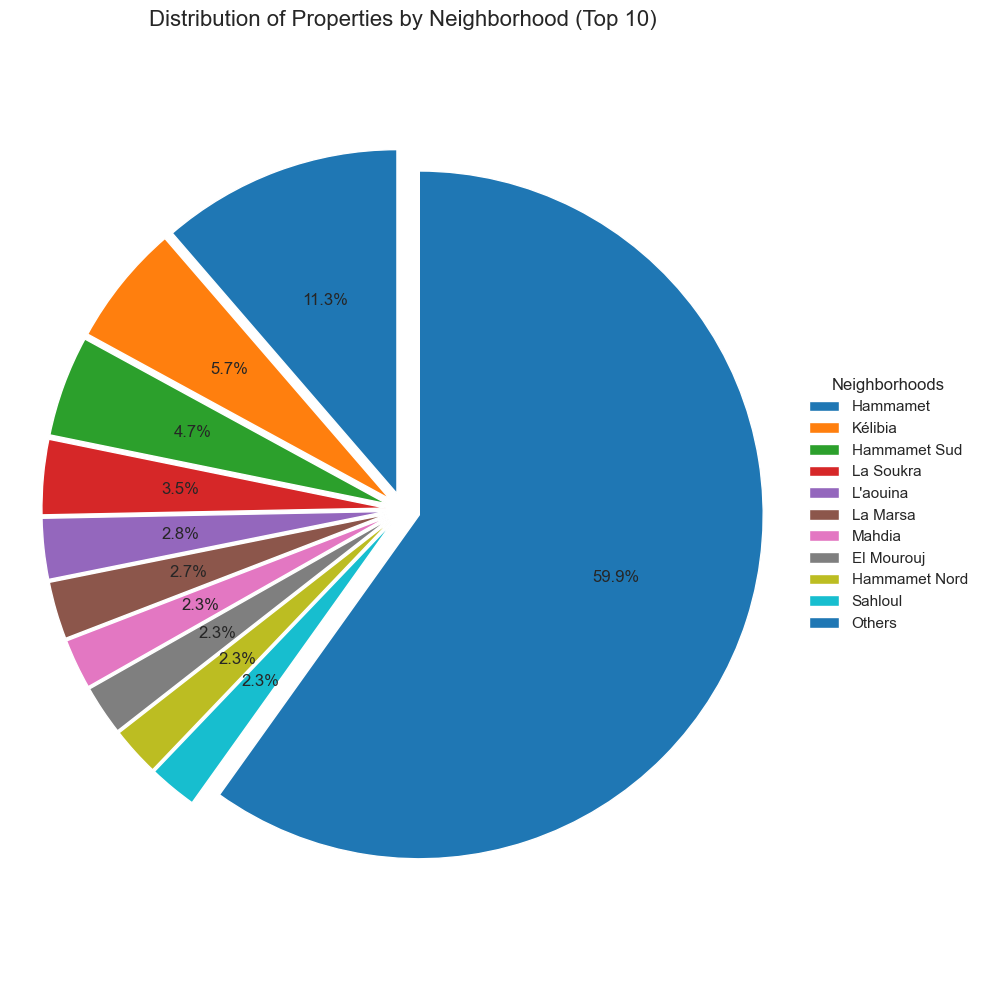

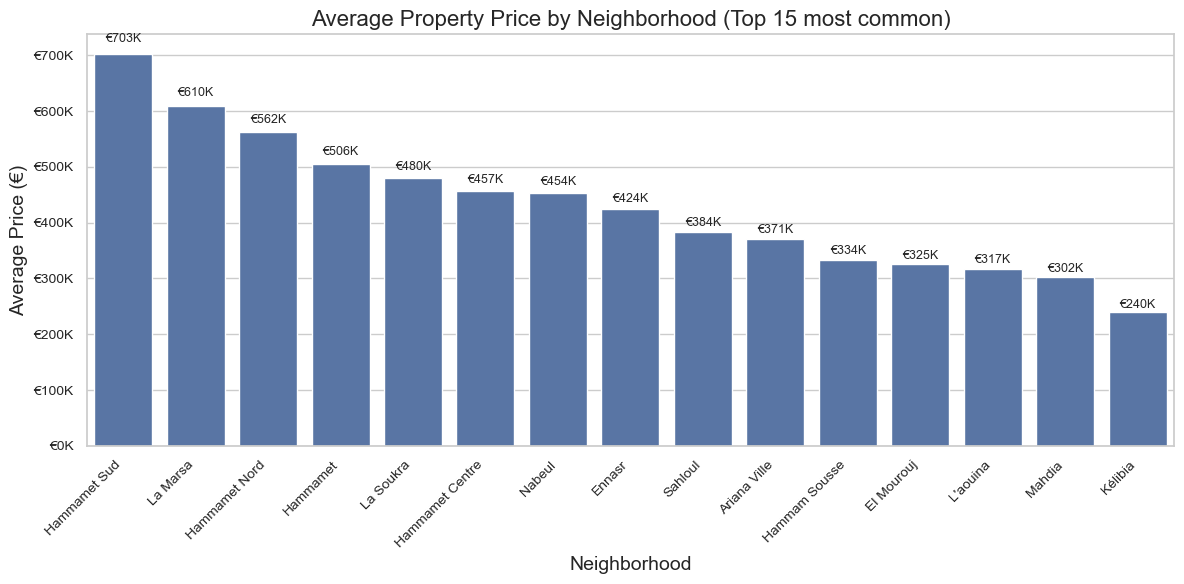

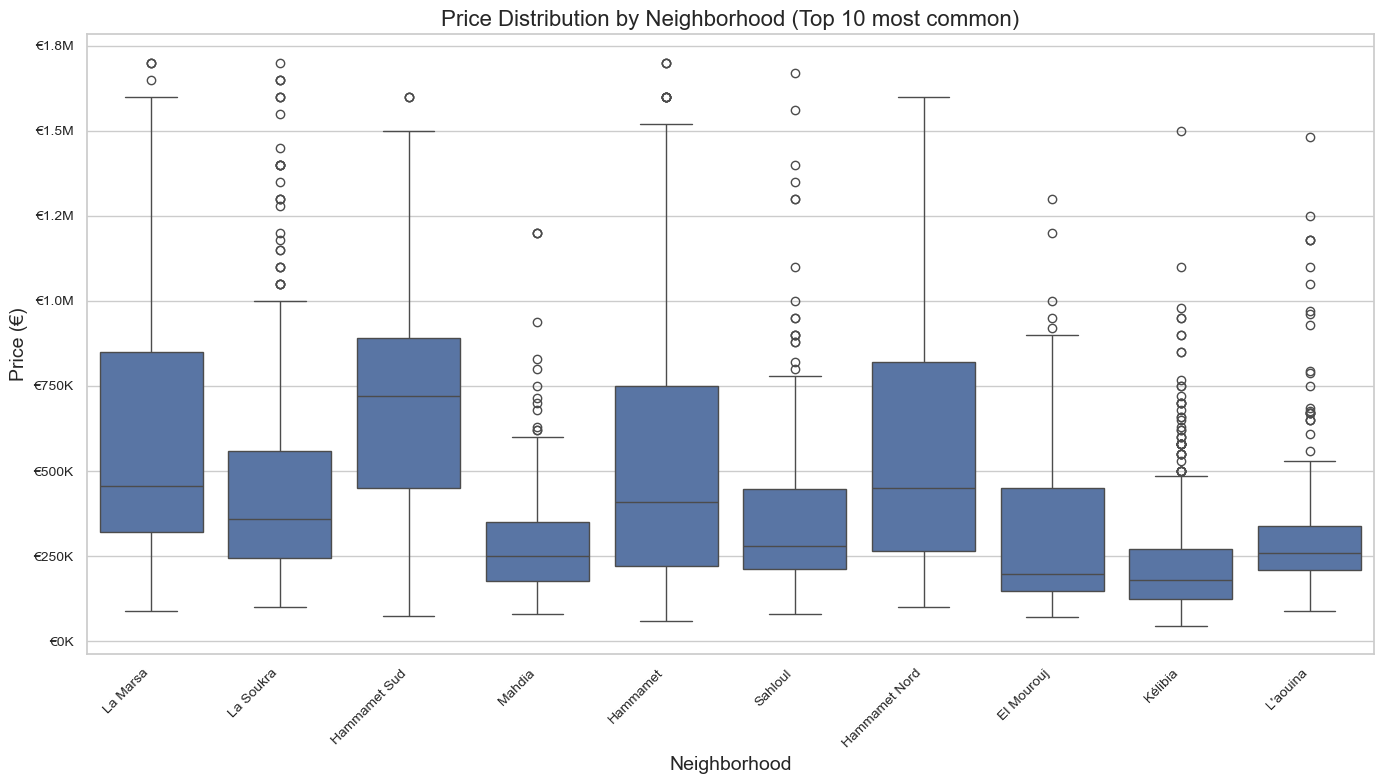

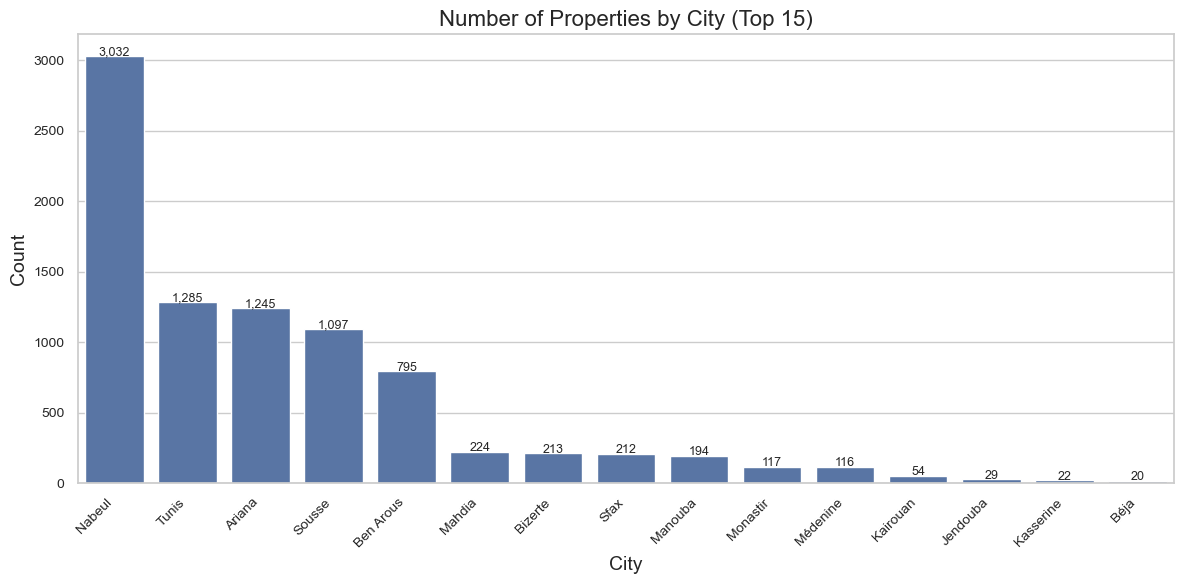

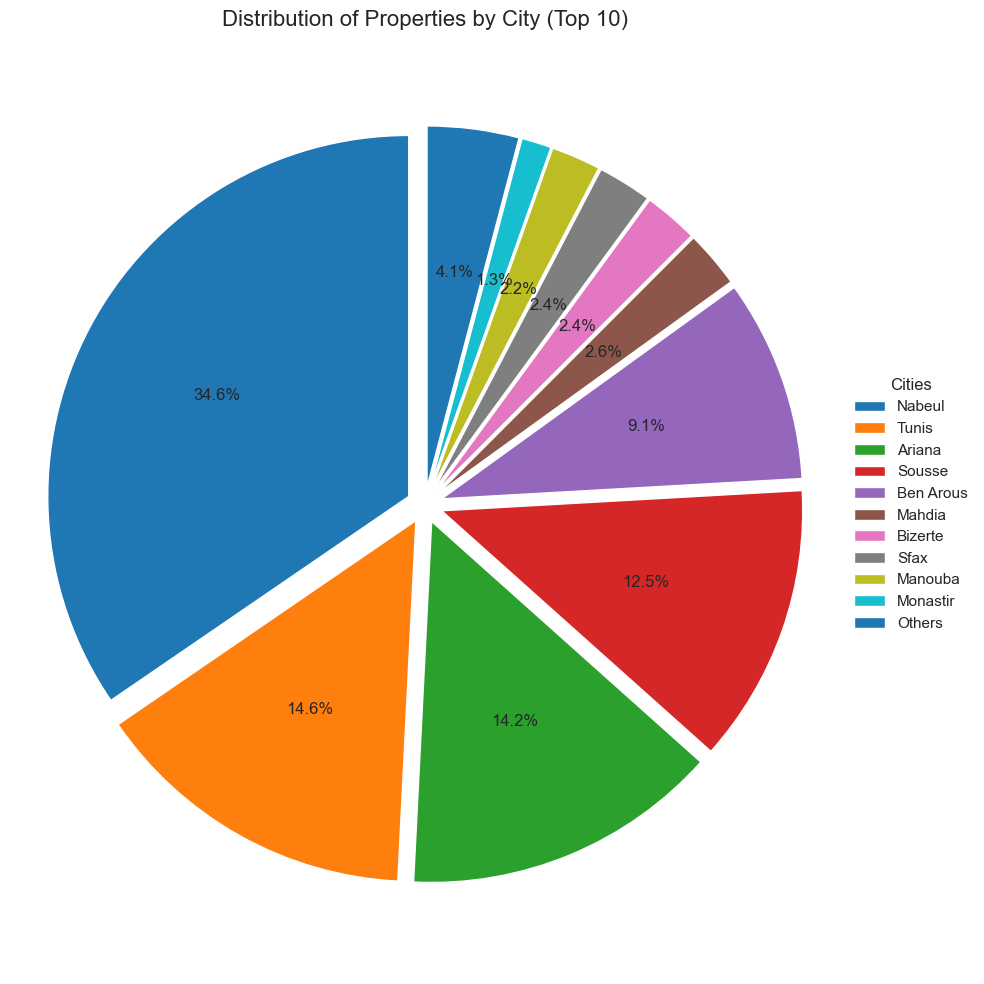

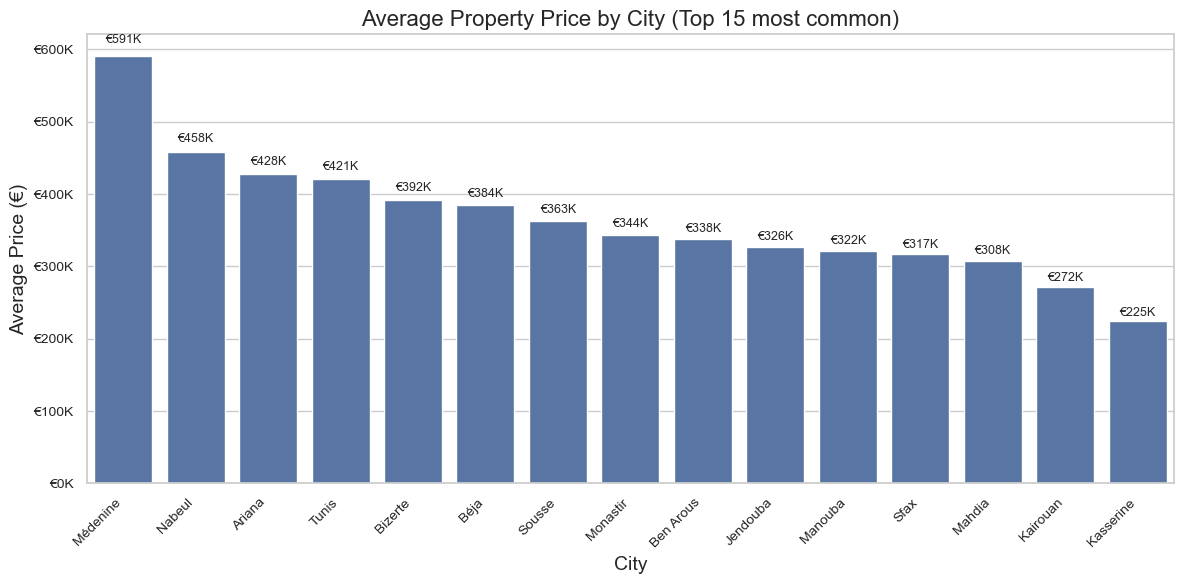

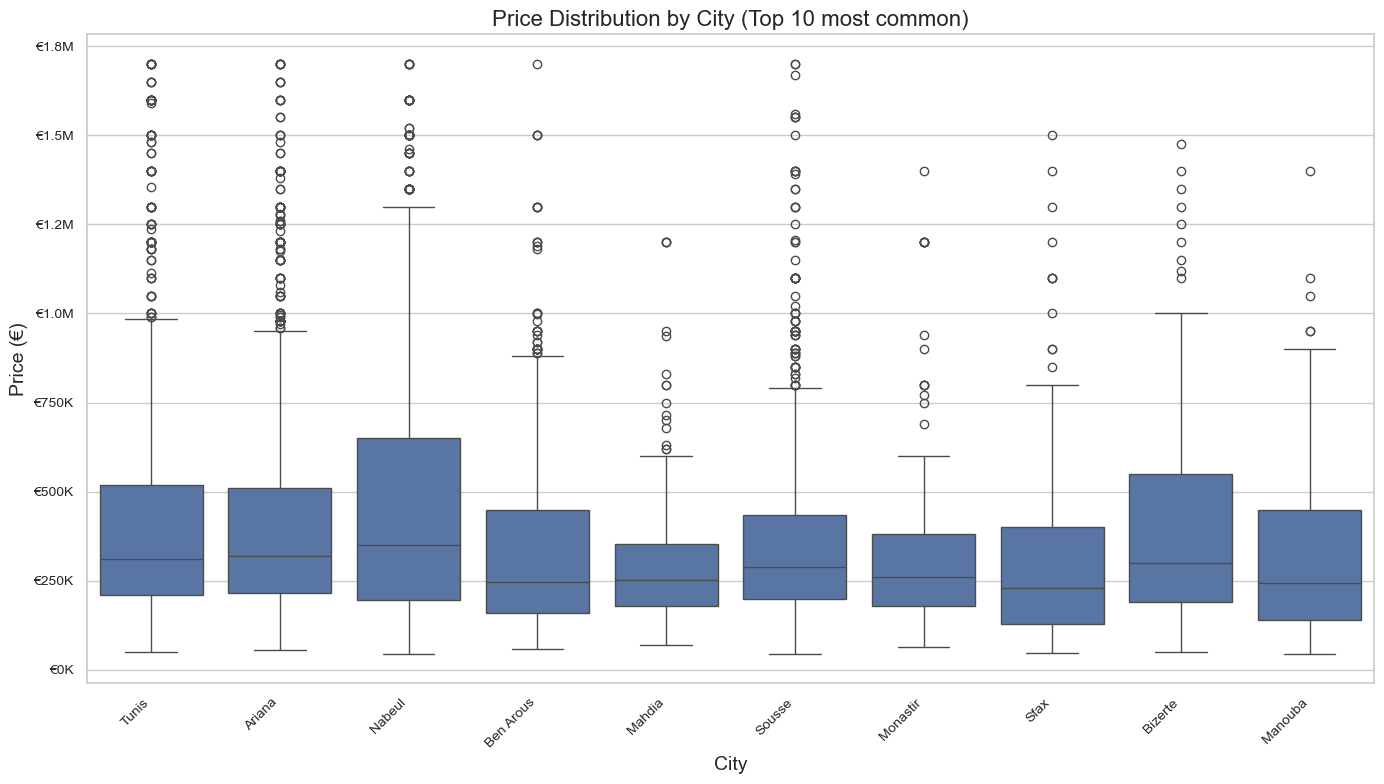

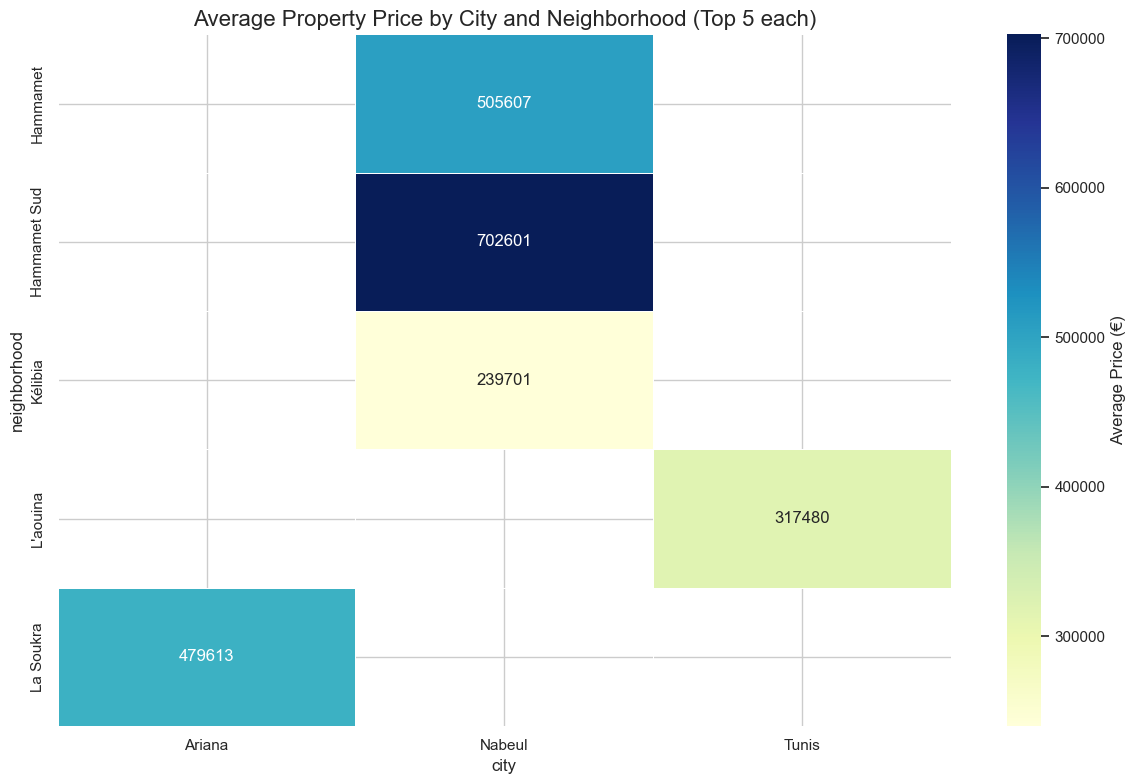

<Figure size 1200x800 with 0 Axes>

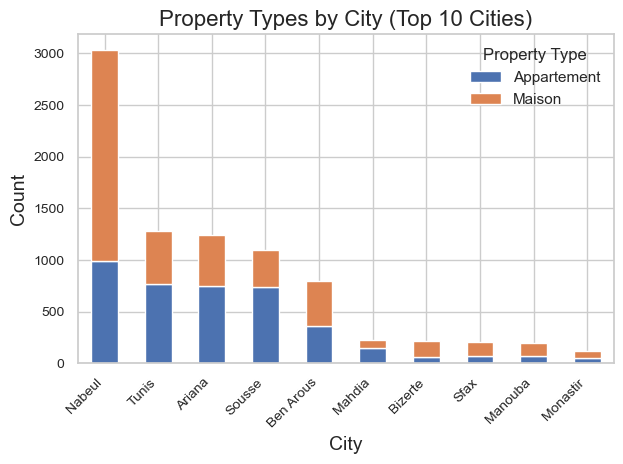

<Figure size 1400x1000 with 0 Axes>

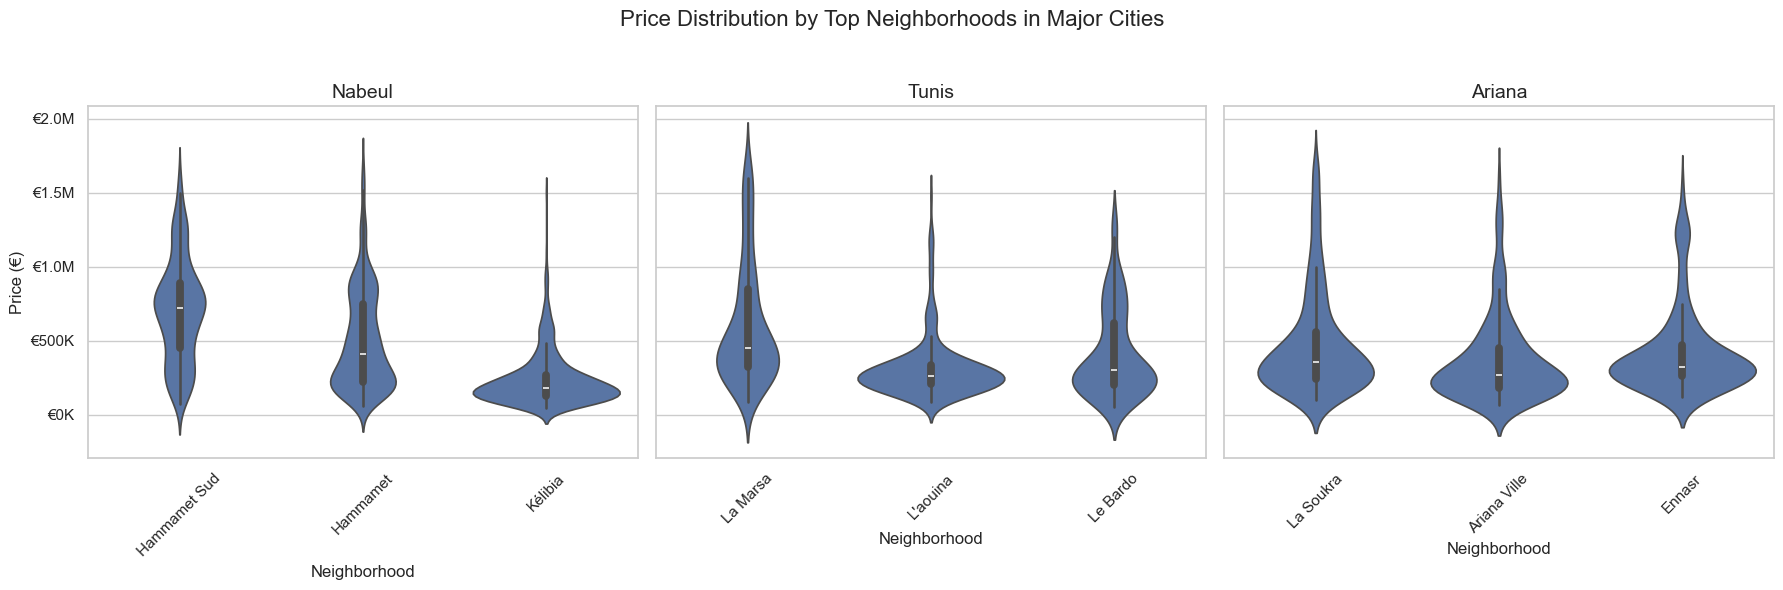

<Figure size 1200x800 with 0 Axes>

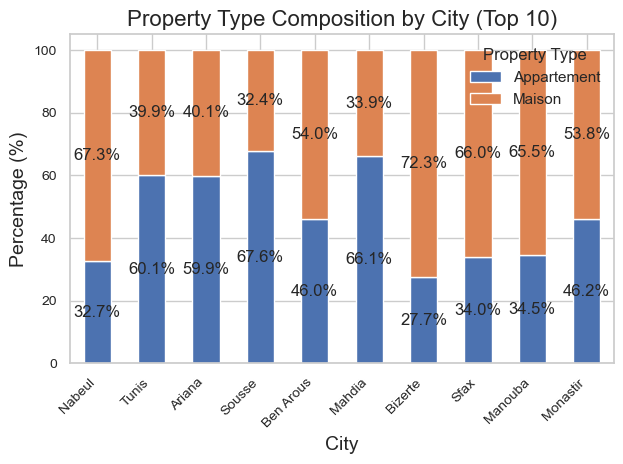

In [47]:
# Neighborhood and City Analysis Visualizations

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.ticker as ticker

# Set the style for better visualizations
plt.style.use('seaborn-v0_8-whitegrid')
sns.set_palette('deep')
sns.set_context('notebook')

# Function to format prices in thousands/millions
def format_price(x, pos):
    if x >= 1e6:
        return '€{:,.1f}M'.format(x*1e-6)
    else:
        return '€{:,.0f}K'.format(x*1e-3)

price_formatter = ticker.FuncFormatter(format_price)

# 1. NEIGHBORHOOD ANALYSIS
# ------------------------

# 1.1 Count of properties by neighborhood (top 15)
plt.figure(figsize=(12, 6))
neighborhood_counts = df['neighborhood'].value_counts().head(15)
ax = sns.barplot(x=neighborhood_counts.index, y=neighborhood_counts.values)
plt.title('Number of Properties by Neighborhood (Top 15)', fontsize=16)
plt.xlabel('Neighborhood', fontsize=14)
plt.ylabel('Count', fontsize=14)
plt.xticks(rotation=45, ha='right', fontsize=10)
plt.yticks(fontsize=10)

# Add count labels
for i, count in enumerate(neighborhood_counts.values):
    ax.text(i, count + 5, f"{count:,}", ha='center', fontsize=9)

plt.tight_layout()
plt.savefig('neighborhood_count.png', dpi=300, bbox_inches='tight')
plt.show()

# 1.2 Pie chart of top 10 neighborhoods
plt.figure(figsize=(10, 10))
top_neighborhoods = df['neighborhood'].value_counts().head(10)
others = df['neighborhood'].value_counts().iloc[10:].sum()
sizes = list(top_neighborhoods.values) + [others]
labels = list(top_neighborhoods.index) + ['Others']

# Use a colorful palette for the pie chart
colors = sns.color_palette('tab10')
explode = [0.05] * len(labels)  # Explode all slices slightly

plt.pie(sizes, labels=None, autopct='%1.1f%%', startangle=90, 
        shadow=False, explode=explode, colors=colors)
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle
plt.title('Distribution of Properties by Neighborhood (Top 10)', fontsize=16)

# Add legend outside the pie chart
plt.legend(labels, title="Neighborhoods", loc="center left", bbox_to_anchor=(1, 0, 0.5, 1))
plt.tight_layout()
plt.savefig('neighborhood_pie.png', dpi=300, bbox_inches='tight')
plt.show()

# 1.3 Average price by neighborhood (top 15 by count)
plt.figure(figsize=(12, 6))
top15_neighborhoods = df['neighborhood'].value_counts().head(15).index
neighborhood_avg_price = df[df['neighborhood'].isin(top15_neighborhoods)].groupby('neighborhood')['price'].mean().sort_values(ascending=False)

ax = sns.barplot(x=neighborhood_avg_price.index, y=neighborhood_avg_price.values)
plt.title('Average Property Price by Neighborhood (Top 15 most common)', fontsize=16)
plt.xlabel('Neighborhood', fontsize=14)
plt.ylabel('Average Price (€)', fontsize=14)
plt.xticks(rotation=45, ha='right', fontsize=10)
plt.yticks(fontsize=10)
ax.yaxis.set_major_formatter(price_formatter)

# Add price labels
for i, price in enumerate(neighborhood_avg_price.values):
    ax.text(i, price + (price*0.03), format_price(price, 0), ha='center', fontsize=9)

plt.tight_layout()
plt.savefig('neighborhood_avg_price.png', dpi=300, bbox_inches='tight')
plt.show()

# 1.4 Box plot of prices by top 10 neighborhoods
plt.figure(figsize=(14, 8))
top10_neighborhoods = df['neighborhood'].value_counts().head(10).index
neighborhood_plot_data = df[df['neighborhood'].isin(top10_neighborhoods)]

ax = sns.boxplot(x='neighborhood', y='price', data=neighborhood_plot_data)
plt.title('Price Distribution by Neighborhood (Top 10 most common)', fontsize=16)
plt.xlabel('Neighborhood', fontsize=14)
plt.ylabel('Price (€)', fontsize=14)
plt.xticks(rotation=45, ha='right', fontsize=10)
plt.yticks(fontsize=10)
ax.yaxis.set_major_formatter(price_formatter)
plt.tight_layout()
plt.savefig('neighborhood_boxplot.png', dpi=300, bbox_inches='tight')
plt.show()

# 2. CITY ANALYSIS
# ----------------

# 2.1 Count of properties by city (top 15)
plt.figure(figsize=(12, 6))
city_counts = df['city'].value_counts().head(15)
ax = sns.barplot(x=city_counts.index, y=city_counts.values)
plt.title('Number of Properties by City (Top 15)', fontsize=16)
plt.xlabel('City', fontsize=14)
plt.ylabel('Count', fontsize=14)
plt.xticks(rotation=45, ha='right', fontsize=10)
plt.yticks(fontsize=10)

# Add count labels
for i, count in enumerate(city_counts.values):
    ax.text(i, count + 5, f"{count:,}", ha='center', fontsize=9)

plt.tight_layout()
plt.savefig('city_count.png', dpi=300, bbox_inches='tight')
plt.show()

# 2.2 Pie chart of top 10 cities
plt.figure(figsize=(10, 10))
top_cities = df['city'].value_counts().head(10)
others_cities = df['city'].value_counts().iloc[10:].sum()
city_sizes = list(top_cities.values) + [others_cities]
city_labels = list(top_cities.index) + ['Others']

colors = sns.color_palette('tab10')
explode = [0.05] * len(city_labels)

plt.pie(city_sizes, labels=None, autopct='%1.1f%%', startangle=90, 
        shadow=False, explode=explode, colors=colors)
plt.axis('equal')
plt.title('Distribution of Properties by City (Top 10)', fontsize=16)
plt.legend(city_labels, title="Cities", loc="center left", bbox_to_anchor=(1, 0, 0.5, 1))
plt.tight_layout()
plt.savefig('city_pie.png', dpi=300, bbox_inches='tight')
plt.show()

# 2.3 Average price by city (top 15 by count)
plt.figure(figsize=(12, 6))
top15_cities = df['city'].value_counts().head(15).index
city_avg_price = df[df['city'].isin(top15_cities)].groupby('city')['price'].mean().sort_values(ascending=False)

ax = sns.barplot(x=city_avg_price.index, y=city_avg_price.values)
plt.title('Average Property Price by City (Top 15 most common)', fontsize=16)
plt.xlabel('City', fontsize=14)
plt.ylabel('Average Price (€)', fontsize=14)
plt.xticks(rotation=45, ha='right', fontsize=10)
plt.yticks(fontsize=10)
ax.yaxis.set_major_formatter(price_formatter)

# Add price labels
for i, price in enumerate(city_avg_price.values):
    ax.text(i, price + (price*0.03), format_price(price, 0), ha='center', fontsize=9)

plt.tight_layout()
plt.savefig('city_avg_price.png', dpi=300, bbox_inches='tight')
plt.show()

# 2.4 Box plot of prices by top 10 cities
plt.figure(figsize=(14, 8))
top10_cities = df['city'].value_counts().head(10).index
city_plot_data = df[df['city'].isin(top10_cities)]

ax = sns.boxplot(x='city', y='price', data=city_plot_data)
plt.title('Price Distribution by City (Top 10 most common)', fontsize=16)
plt.xlabel('City', fontsize=14)
plt.ylabel('Price (€)', fontsize=14)
plt.xticks(rotation=45, ha='right', fontsize=10)
plt.yticks(fontsize=10)
ax.yaxis.set_major_formatter(price_formatter)
plt.tight_layout()
plt.savefig('city_boxplot.png', dpi=300, bbox_inches='tight')
plt.show()

# 3. RELATIONSHIP BETWEEN CITY AND NEIGHBORHOOD
# ---------------------------------------------

# 3.1 Heatmap of average prices by city and neighborhood (top 5 each)
top5_cities = df['city'].value_counts().head(5).index
top5_neighborhoods = df['neighborhood'].value_counts().head(5).index

# Filter data to include only top 5 cities and neighborhoods
heatmap_data = df[df['city'].isin(top5_cities) & df['neighborhood'].isin(top5_neighborhoods)]

# Create pivot table of average prices
pivot_data = heatmap_data.pivot_table(values='price', index='neighborhood', columns='city', aggfunc='mean')

plt.figure(figsize=(12, 8))
ax = sns.heatmap(pivot_data, annot=True, fmt='.0f', cmap='YlGnBu', linewidths=0.5, 
                 cbar_kws={'label': 'Average Price (€)'})
plt.title('Average Property Price by City and Neighborhood (Top 5 each)', fontsize=16)
plt.tight_layout()
plt.savefig('city_neighborhood_heatmap.png', dpi=300, bbox_inches='tight')
plt.show()

# 3.2 Count of properties by city and property type
plt.figure(figsize=(12, 8))
city_property_counts = pd.crosstab(df['city'], df['property_type'])
city_property_counts = city_property_counts.loc[city_property_counts.sum(axis=1).sort_values(ascending=False).head(10).index]

ax = city_property_counts.plot(kind='bar', stacked=True)
plt.title('Property Types by City (Top 10 Cities)', fontsize=16)
plt.xlabel('City', fontsize=14)
plt.ylabel('Count', fontsize=14)
plt.xticks(rotation=45, ha='right', fontsize=10)
plt.yticks(fontsize=10)
plt.legend(title='Property Type')
plt.tight_layout()
plt.savefig('city_property_type.png', dpi=300, bbox_inches='tight')
plt.show()

# 4. RELATIONSHIP BETWEEN PRICE AND LOCATION (COMBINED ANALYSIS)
# --------------------------------------------------------------

# 4.1 City-Neighborhood price violin plot (top 3 cities, top 3 neighborhoods each)
top3_cities = df['city'].value_counts().head(3).index
plt.figure(figsize=(14, 10))

# Initialize the plot
fig, axes = plt.subplots(1, len(top3_cities), figsize=(18, 6), sharey=True)
fig.suptitle('Price Distribution by Top Neighborhoods in Major Cities', fontsize=16)

# For each top city
for i, city in enumerate(top3_cities):
    # Get the top 3 neighborhoods in this city
    city_data = df[df['city'] == city]
    top_neighborhoods = city_data['neighborhood'].value_counts().head(3).index
    
    # Filter data for these neighborhoods
    plot_data = city_data[city_data['neighborhood'].isin(top_neighborhoods)]
    
    # Create the violin plot
    sns.violinplot(x='neighborhood', y='price', data=plot_data, ax=axes[i])
    axes[i].set_title(f"{city}", fontsize=14)
    axes[i].set_xlabel('Neighborhood', fontsize=12)
    axes[i].set_ylabel('Price (€)' if i == 0 else '')
    axes[i].yaxis.set_major_formatter(price_formatter)
    axes[i].tick_params(axis='x', rotation=45)

plt.tight_layout(rect=[0, 0, 1, 0.95])  # Make room for the suptitle
plt.savefig('city_neighborhood_violins.png', dpi=300, bbox_inches='tight')
plt.show()

# 5. Property Type Distribution by Location
# ----------------------------------------

# 5.1 Property type composition by top cities
plt.figure(figsize=(12, 8))
top10_cities = df['city'].value_counts().head(10).index
city_property_pct = pd.crosstab(df['city'], df['property_type'], normalize='index') * 100
city_property_pct = city_property_pct.loc[top10_cities]

ax = city_property_pct.plot(kind='bar', stacked=True)
plt.title('Property Type Composition by City (Top 10)', fontsize=16)
plt.xlabel('City', fontsize=14)
plt.ylabel('Percentage (%)', fontsize=14)
plt.xticks(rotation=45, ha='right', fontsize=10)
plt.yticks(fontsize=10)
plt.legend(title='Property Type')

# Add percentage labels
for c in ax.containers:
    labels = [f'{v:.1f}%' if v > 5 else '' for v in c.datavalues]
    ax.bar_label(c, labels=labels, label_type='center')

plt.tight_layout()
plt.savefig('city_property_composition.png', dpi=300, bbox_inches='tight')
plt.show()

In [48]:
df['neighborhood'].isnull().sum()

np.int64(2)

In [49]:
# Check how many null values exist in the neighborhood column
print(f"Number of null values in neighborhood column: {df['neighborhood'].isnull().sum()}")

# Drop rows where neighborhood is null
df = df.dropna(subset=['neighborhood'])

# Verify the null values are gone
print(f"Number of null values in neighborhood column after dropping: {df['neighborhood'].isnull().sum()}")
print(f"New dataframe shape: {df.shape}")

Number of null values in neighborhood column: 2
Number of null values in neighborhood column after dropping: 0
New dataframe shape: (8774, 32)


In [50]:
df['city'].isnull().sum()

np.int64(0)

In [51]:
pip install category_encoders

  Using cached category_encoders-2.8.1-py3-none-any.whl.metadata (7.9 kB)
  Using cached patsy-1.0.1-py2.py3-none-any.whl.metadata (3.3 kB)
  Using cached statsmodels-0.14.4-cp312-cp312-win_amd64.whl.metadata (9.5 kB)
Using cached category_encoders-2.8.1-py3-none-any.whl (85 kB)
Using cached patsy-1.0.1-py2.py3-none-any.whl (232 kB)
Using cached statsmodels-0.14.4-cp312-cp312-win_amd64.whl (9.8 MB)
Note: you may need to restart the kernel to use updated packages.


In [52]:
import pandas as pd
import numpy as np

# Print info about the categorical columns before encoding
print(f"Number of unique neighborhoods: {df['neighborhood'].nunique()}")
print(f"Number of unique cities: {df['city'].nunique()}")

# Manual implementation of target encoding with some smoothing
def target_encode(df, column, target, alpha=5):
    # Calculate global mean
    global_mean = df[target].mean()
    
    # Calculate means and counts for each category
    agg = df.groupby(column)[target].agg(['mean', 'count'])
    
    # Apply smoothing
    smooth = (agg['count'] * agg['mean'] + alpha * global_mean) / (agg['count'] + alpha)
    
    # Create mapping dictionary
    mapping = smooth.to_dict()
    
    return df[column].map(mapping)

# Apply target encoding
df['neighborhood_encoded'] = target_encode(df, 'neighborhood', 'price')
df['city_encoded'] = target_encode(df, 'city', 'price')

# Print sample of encoding results
print("\nSample of target encoding results:")
sample_neighborhoods = df[['neighborhood', 'neighborhood_encoded']].drop_duplicates().head(5)
print("Neighborhood encoding sample:")
print(sample_neighborhoods)

sample_cities = df[['city', 'city_encoded']].drop_duplicates().head(5)
print("\nCity encoding sample:")
print(sample_cities)

# Create a copy of the original dataframe before dropping columns
df_original = df.copy()

# Drop original columns
df = df.drop(['neighborhood', 'city'], axis=1)

print("\nTarget Encoding Complete")
print("Neighborhood and city columns have been encoded based on their relationship with price")
print(f"Added 2 new features: neighborhood_encoded, city_encoded")

Number of unique neighborhoods: 200
Number of unique cities: 24

Sample of target encoding results:
Neighborhood encoding sample:
         neighborhood  neighborhood_encoded
1            La Marsa         605527.358190
3           La Soukra         478486.511726
4              Mrezga         369792.118241
5  Centre Urbain Nord         520341.334729
7        Hammamet Sud         699111.916109

City encoding sample:
         city   city_encoded
1       Tunis  421175.174172
3      Ariana  427787.785346
4      Nabeul  458175.619915
11  Ben Arous  338241.039603
13     Mahdia  309926.876341

Target Encoding Complete
Neighborhood and city columns have been encoded based on their relationship with price
Added 2 new features: neighborhood_encoded, city_encoded


In [53]:
df.columns.tolist()

['price',
 'property_type',
 'bedrooms',
 'bathrooms',
 'total_rooms',
 'living_area',
 'land_area',
 'climatisation',
 'parabole_tv',
 'pool',
 'handicapped_access',
 'parking',
 'garage',
 'garden',
 'fireplace',
 'interphone',
 'terrace',
 'electric_heating',
 'elevator',
 'alarm_system',
 'internet_access',
 'sea_view',
 'furnished',
 'central_heating',
 'kitchen_equipped',
 'is_house',
 'has_many_bedrooms',
 'many_bathrooms',
 'has_many_total_rooms',
 'area_ratio',
 'neighborhood_encoded',
 'city_encoded']

In [54]:
# List of all binary amenity features to invert
binary_features = ['climatisation', 'parabole_tv', 'pool', 'handicapped_access', 
                  'parking', 'garage', 'garden', 'fireplace', 'interphone', 
                  'terrace', 'electric_heating', 'elevator', 'alarm_system', 
                  'internet_access', 'sea_view', 'furnished', 'central_heating', 
                  'kitchen_equipped']

# Invert all these features (0 becomes 1, 1 becomes 0)
for feature in binary_features:
    df[feature] = 1 - df[feature]
    
# Print the updated distribution to verify
feature_stats = pd.DataFrame({
    'Feature': binary_features,
    'Count_1': [df[col].sum() for col in binary_features],
    'Percentage_1': [(df[col].sum() / len(df)) * 100 for col in binary_features]
})

print("After inversion (now 1 means feature is present):")
print(feature_stats.sort_values('Percentage_1', ascending=False))

# You might also want to rename the columns to make it clear that 1 now means "has feature"
# This step is optional but can make your code more readable
for feature in binary_features:
    new_name = 'has_' + feature
    df = df.rename(columns={feature: new_name})
    
print("\nColumn names updated to clarify meaning")

After inversion (now 1 means feature is present):
               Feature  Count_1  Percentage_1
9              terrace     3225     36.756326
0        climatisation     3202     36.494187
17    kitchen_equipped     3014     34.351493
6               garden     2902     33.074994
16     central_heating     2873     32.744472
4              parking     2171     24.743561
5               garage     2059     23.467062
8           interphone     1736     19.785731
1          parabole_tv     1717     19.569182
11            elevator     1240     14.132665
2                 pool     1222     13.927513
13     internet_access     1139     12.981536
12        alarm_system      974     11.100980
14            sea_view      950     10.827445
15           furnished      644      7.339868
10    electric_heating      631      7.191703
3   handicapped_access      550      6.268521
7            fireplace      235      2.678368

Column names updated to clarify meaning


In [55]:
df.columns.tolist()

['price',
 'property_type',
 'bedrooms',
 'bathrooms',
 'total_rooms',
 'living_area',
 'land_area',
 'has_climatisation',
 'has_parabole_tv',
 'has_pool',
 'has_handicapped_access',
 'has_parking',
 'has_garage',
 'has_garden',
 'has_fireplace',
 'has_interphone',
 'has_terrace',
 'has_electric_heating',
 'has_elevator',
 'has_alarm_system',
 'has_internet_access',
 'has_sea_view',
 'has_furnished',
 'has_central_heating',
 'has_kitchen_equipped',
 'is_house',
 'has_many_bedrooms',
 'many_bathrooms',
 'has_many_total_rooms',
 'area_ratio',
 'neighborhood_encoded',
 'city_encoded']

In [56]:
# Save the preprocessed dataset to CSV
df.to_csv('menzli_modeling.csv', index=False)

print(f"Dataset successfully saved to 'menzli_modeling.csv'")
print(f"The file contains {df.shape[0]} rows and {df.shape[1]} columns")

Dataset successfully saved to 'menzli_modeling.csv'
The file contains 8774 rows and 32 columns
